# **Project Name**    - **Mobile Price Range Prediction**


##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member** - Girish R


# **Project Summary -**

In this project, I will investigate and analyse a dataset containing the specifications of two thousand mobile phones in order to gain insights into market trends. I'll look into the relationships between key features like memory, display, battery, and camera and how they affect mobile phone pricing. I will train a model to predict the price range of a new mobile phone based on its features using machine learning algorithms such as Support Vector Machine, Random Forest Classifier, Logistic Regression, Decision Tree, Naive Bayes Theorem, and K-nearest neighbours. This model can be used by mobile phone companies to inform pricing strategies, as well as by consumers to make informed decisions about mobile phone purchases.Finally, the project's goal is to provide valuable insights into the mobile phone market and assist stakeholders in making data-driven decisions.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is

### **AIM**
In this project, we are predicting the price range of the mobile device based on its specifications, such as its battery life, 3G connectivity, wifi, Bluetooth, and RAM.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

# setting max display column limit to 30
pd.set_option("display.max_columns", 30)

#set style
# plt.style.use('seaborn')
sns.set()

# setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
# Connect To Google Drive
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Classification Project/data_mobile_price_range.csv' # CSV file loaction path
mobile_df = pd.read_csv(path) # importing csv file into Pandas dataframe.

### Dataset First View

In [ ]:
# Dataset First Look
# first 10 rows
mobile_df.head(10)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   
5           1859     0          0.5         1   3       0          22    0.7   
6           1821     0          1.7         0   4       1          10    0.8   
7           1954     0          0.5         1   0       0          24    0.8   
8           1445     1          0.5         0   0       0          53    0.7   
9            509     1          0.6         1   2       1           9    0.1   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   
5        164        1   7       1004      1654  1067    17     1         10   
6        139        8  10        381      1018  3220    13     8         18   
7        187        4   0        512      1149   700    16     3          5   
8        174        7  14        386       836  1099    17     1         20   
9         93        5  15       1137      1224   513    19    10         12   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  
5        1             0     0            1  
6        1             0     1            3  
7        1             1     1            0  
8        1             0     0            0  
9        1             0     0            0

In [ ]:
# Last 10 Rows of the data
mobile_df.tail(10)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1990           1617     1          2.4         0   8       1          36   
1991           1882     0          2.0         0  11       1          44   
1992            674     1          2.9         1   1       0          21   
1993           1467     1          0.5         0   0       0          18   
1994            858     0          2.2         0   1       0          50   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1990    0.8         85        1   9        743      1426   296     5     3   
1991    0.8        113        8  19          4       743  3579    19     8   
1992    0.2        198        3   4        576      1809  1180     6     3   
1993    0.6        122        5   0        888      1099  3962    15    11   
1994    0.1         84        1   2        528      1416  3978    17    16   
1995    0.8        106        6  14       1222      1890   668    13     4   
1996    0.2        187        4   3        915      1965  2032    11    10   
1997    0.7        108        8   3        868      1632  3057     9     1   
1998    0.1        145        5   5        336       670   869    18    10   
1999    0.9        168        6  16        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1990          7        1             0     0            0  
1991         20        1             1     0            3  
1992          4        1             1     1            0  
1993          5        1             1     1            3  
1994          3        1             1     0            3  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(mobile_df.shape)
print(f'Total Rows = {mobile_df.shape[0]}\nTotol Columns={mobile_df.shape[1]} ')

(2000, 21)
Total Rows = 2000
Totol Columns=21 


### Dataset Information

In [ ]:
# Dataset Info
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(mobile_df[mobile_df.duplicated()])

0

There are no duplicate values

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(mobile_df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


Text(0.5, 1.0, ' Visualising Missing Values')

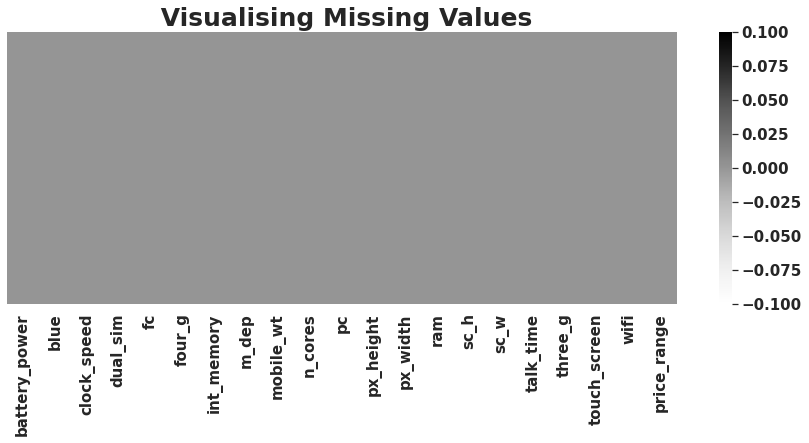

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(15,5))
sns.heatmap(mobile_df.isnull(),cmap='Greys',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

### What did you know about your dataset?

1. The dataset is from competitive mobile market companies, and we are not required to predict the actual price but rather a price range indicating how high the price is.

2. Mobile phones come in a variety of prices, features, and specifications. Price estimation and prediction are critical components of consumer strategy. Choosing the appropriate price for a product is critical to its market success. A new product that must be launched must be priced appropriately so that consumers find it appropriate to purchase the product.

3. The dataset shown above has 2000 rows and 21 columns. The dataset contains no missing or duplicate values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
mobile_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Dataset Describe
mobile_df.describe(include='all').T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

Some Basic Observations:

We can see that sc_width and px_height has minimum value 0. which is not possible in any mobile. We need to handle this mismatch.

In [ ]:
# Checking How many observations having screen width value as 0.
print(mobile_df[mobile_df['sc_w']==0].shape[0])

180


In [ ]:
# Checking How many observations having px_hieght value as 0.
print(mobile_df[mobile_df['px_height']==0].shape[0])

2


In [ ]:
# As there are only 2 observations having px_height=0. so we will drop it.
mobile_df=mobile_df[mobile_df['px_height']!=0]

### Variables Description 

1. **Battery_power** : Total energy a battery can store in one time measured in mAh

2. **Blue** : Has bluetooth or not

3. **Clock_speed** : speed at which microprocessor executes instructions

4. **Dual_sim** : Has dual sim support or not

5. **Fc** : Front Camera mega pixels

6. **Four_g** : Has 4G or not

7. **Int_memory** : Internal Memory in Gigabytes

8. **M_dep** : Mobile Depth in cm

9. **Mobile_wt** : Weight of mobile phone

10. **N_cores** : Number of cores of processor

11. **Pc** : Primary Camera mega pixels

12. **Px_height** : Pixel Resolution Height

13. **Px_width** : Pixel Resolution Width

14. **Ram** : Random Access Memory in Mega

15. **Touch_screen** : Has touch screen or not

16. **Wifi** : Has wifi or not

17. **Sc_h** : Screen Height of mobile in cm

18. **Sc_w** : Screen Width of mobile in cm

19. **Talk_time** : longest time that a single battery charge will last when you are

19. **Three_g** : Has 3G or not

20. **Wifi** : Has wifi or not

21. **Price_range** : This is the target variable with value of 0(low cost), (medium cost),2(high cost) and 3(very high cost).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in mobile_df.columns.tolist():
  print("No. of unique values in ",i,"is",mobile_df[i].nunique(),".")

No. of unique values in  battery_power is 1093 .
No. of unique values in  blue is 2 .
No. of unique values in  clock_speed is 26 .
No. of unique values in  dual_sim is 2 .
No. of unique values in  fc is 20 .
No. of unique values in  four_g is 2 .
No. of unique values in  int_memory is 63 .
No. of unique values in  m_dep is 10 .
No. of unique values in  mobile_wt is 121 .
No. of unique values in  n_cores is 8 .
No. of unique values in  pc is 21 .
No. of unique values in  px_height is 1136 .
No. of unique values in  px_width is 1109 .
No. of unique values in  ram is 1561 .
No. of unique values in  sc_h is 15 .
No. of unique values in  sc_w is 19 .
No. of unique values in  talk_time is 19 .
No. of unique values in  three_g is 2 .
No. of unique values in  touch_screen is 2 .
No. of unique values in  wifi is 2 .
No. of unique values in  price_range is 4 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Create a copy of the current dataset and assigning to df
df=mobile_df.copy()

# Checking mobile belongs to price range 0
print("The number of mobiles in the price_range 0 is :",len(df[df['price_range']==0]))

# Checking mobile belongs to price range 1
print("The number of mobiles in the price_range 1 is :",len(df[df['price_range']==1]))

# Checking mobile belongs to price range 2
print("The number of mobiles in the price_range 2 is :",len(df[df['price_range']==2]))

# Checking mobile belongs to price range 3
print("The number of mobiles in the price_range 3 is :",len(df[df['price_range']==3]))

The number of mobiles in the price_range 0 is : 500
The number of mobiles in the price_range 1 is : 499
The number of mobiles in the price_range 2 is : 500
The number of mobiles in the price_range 3 is : 499


In [ ]:
# show value counts
df['price_range'].value_counts()

2    500
0    500
1    499
3    499
Name: price_range, dtype: int64

In [ ]:
# Mobile phones groupby 4g support and not supports
df.groupby('four_g')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

four_g  price_range  Count
4       1            3    274
5       1            1    261
6       1            0    259
0       0            2    253
7       1            2    247
1       0            0    241
2       0            1    238
3       0            3    225

In [ ]:
# Mobile phones groupby 3g support and not supports
df.groupby('three_g')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

three_g  price_range  Count
4        1            2    387
5        1            3    384
6        1            1    377
7        1            0    373
0        0            0    127
1        0            1    122
2        0            3    115
3        0            2    113

In [ ]:
# Mobile phones groupby blue support and not supports
df.groupby('blue')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

blue  price_range  Count
4     1            3    259
0     0            0    257
1     0            2    257
2     0            1    255
5     1            1    244
6     1            0    243
7     1            2    243
3     0            3    240

In [ ]:
# Mobile phones groupby dual sim support and not supports
df.groupby('dual_sim')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

dual_sim  price_range  Count
4         1            3    265
5         1            1    255
0         0            2    251
1         0            0    250
6         1            0    250
7         1            2    249
2         0            1    244
3         0            3    234

In [ ]:
# Mobile phones groupby touch screen support and not supports
df.groupby('touch_screen')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

touch_screen  price_range  Count
0             0            2    265
4             1            0    262
5             1            1    260
1             0            3    252
6             1            3    247
2             0            1    239
3             0            0    238
7             1            2    235

In [ ]:
# Pixels count
df['px_count'] = df['px_width']*df['px_height']

In [ ]:
# Mobile phones groupby touch screen support and not supports
df.groupby('touch_screen')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

touch_screen  price_range  Count
0             0            2    265
4             1            0    262
5             1            1    260
1             0            3    252
6             1            3    247
2             0            1    239
3             0            0    238
7             1            2    235

In [ ]:
# show price range with descreasing pixel count values
df.sort_values(["px_count"],ascending=False)[ ['price_range', 'px_count'] ].head(12)

price_range  px_count
988             3   3886306
1771            2   3847480
1017            3   3744520
1397            0   3720318
894             2   3711360
1615            3   3703024
260             1   3690192
1163            2   3649920
148             2   3642884
305             1   3629598
873             0   3625056
1827            3   3615696

In [ ]:
# Write your code to make your dataset analysis ready.
mobiledata_num = mobile_df[['battery_power',  'clock_speed' , 'fc','int_memory','m_dep', 'mobile_wt','n_cores', 'pc',
                      'px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time']]

mobiledata_cat = mobile_df[['blue','dual_sim', 'four_g','three_g','touch_screen', 'wifi']]

In [ ]:
mobiledata_num

battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  \
0               842          2.2   1           7    0.6        188        2   
1              1021          0.5   0          53    0.7        136        3   
2               563          0.5   2          41    0.9        145        5   
3               615          2.5   0          10    0.8        131        6   
4              1821          1.2  13          44    0.6        141        2   
...             ...          ...  ..         ...    ...        ...      ...   
1995            794          0.5   0           2    0.8        106        6   
1996           1965          2.6   0          39    0.2        187        4   
1997           1911          0.9   1          36    0.7        108        8   
1998           1512          0.9   4          46    0.1        145        5   
1999            510          2.0   5          45    0.9        168        6   

      pc  px_height  px_width   ram  sc_h  sc_w  talk_time  
0      2         20       756  2549     9     7         19  
1      6        905      1988  2631    17     3          7  
2      6       1263      1716  2603    11     2          9  
3      9       1216      1786  2769    16     8         11  
4     14       1208      1212  1411     8     2         15  
...   ..        ...       ...   ...   ...   ...        ...  
1995  14       1222      1890   668    13     4         19  
1996   3        915      1965  2032    11    10         16  
1997   3        868      1632  3057     9     1          5  
1998   5        336       670   869    18    10         19  
1999  16        483       754  3919    19     4          2  

[1998 rows x 14 columns]

In [ ]:
mobiledata_cat

blue  dual_sim  four_g  three_g  touch_screen  wifi
0        0         0       0        0             0     1
1        1         1       1        1             1     0
2        1         1       1        1             1     0
3        1         0       0        1             0     0
4        1         0       1        1             1     0
...    ...       ...     ...      ...           ...   ...
1995     1         1       1        1             1     0
1996     1         1       0        1             1     1
1997     0         1       1        1             1     0
1998     0         0       1        1             1     1
1999     1         1       1        1             1     1

[1998 rows x 6 columns]

### What all manipulations have you done and insights you found?

The dependent variable are of  4 types of unique variable and all 4 have same length of value.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
# lets have look at our target variable's counts
price_range_values=mobile_df['price_range'].value_counts()
price_range_values

2    500
0    500
1    499
3    499
Name: price_range, dtype: int64

*This is the target variable with value of*

**0=low cost,**

**1=medium cost,**

**2=high cost,**

**3=very high cost.**

<AxesSubplot:ylabel='price_range'>

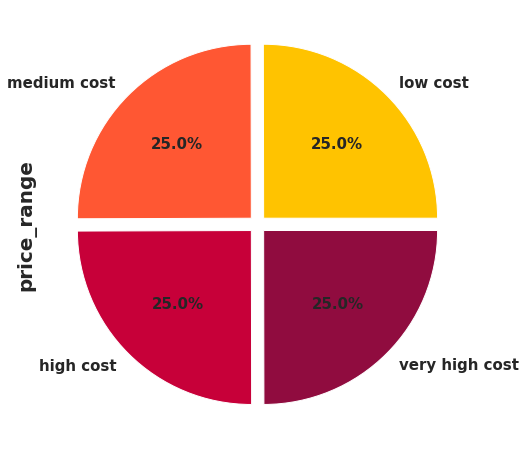

In [ ]:
# Visualizing the Target variable's class distribution.
labels = ["low cost", "medium cost", "high cost", "very high cost"]
colors = ['#FFC300', '#FF5733', '#C70039', '#900C3F']  # specifying the colors I want to use
price_range_values.plot.pie(explode=[0.05]*4, labels=labels, autopct='%1.1f%%', colors=colors, figsize=(12,8), fontsize=15)    # plotting pie chart

##### 1. Why did you pick the specific chart?

A pie chart illustrates a part-to-whole relationship in your data. The area covered in a circle with different colours makes it simple to explain the percentage comparison. When comparing percentages, a pie chart is frequently used. So I used a Pie chart to compare the percentages of the dependent variables.

##### 2. What is/are the insight(s) found from the chart?

According to the above pie chart, there are 500 mobile data that are low cost, which is 25%, 500 mobile data that are medium cost, which is 25%, 500 mobile data that are high cost, which is 25%, and 500 mobile data that are very high cost, which is 25% of the total mobile data given in the dataset.

In other words, all mobile price range categories are equally important, and we must focus on all price range people to maximize our sales and profit.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Mobile price prediction is dependent on many factors such as processor, ram, internal memory, camera mega pixels, and so on. As the value of these features increases, so does the price of a mobile phone.

When Xiaomi MI entered the market, it offered better value for money for mobile phones. It provides more features at a lower cost, which is why it is more popular than other companies. This is the company that brings new premium features at a low cost, such as IR Blasters and Finger Print Censors.

To maximise mobile sales, we must provide more features at lower prices.

#### Chart - 2

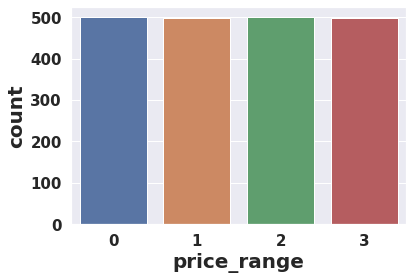

In [ ]:
# Chart - 2 visualization code
sns.countplot(mobile_df['price_range'])
plt.show()

##### 1. Why did you pick the specific chart?

Countplot charts display the frequency counts of values for each level of a categorical or nominal variable. Other statistics, such as percentages, are sometimes shown in bar charts.To show the count of all price range I have used bar chart and four price ranges 500 counts are there.

##### 2. What is/are the insight(s) found from the chart?

Total 2000 dataset from the above count plot chart. I discovered that the dataset contains 500 mobile data that are low cost, 500 mobile data that are medium cost, 500 mobile data that are high cost, and 500 mobile data that are very high cost.

In other words, all mobile price range categories are equally important, and we must focus on all price range people to maximise our sales and profit.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Mobile price prediction is depends upon many factor's like processor, ram, internal memory, camera mega pixels as much as these features increase the value of a mobile price is increased.

When Xiaomi MI came into market it provides better value for the money for mobile phones. It gives more features in less price that's why it more populer than other companies. This is the company that bring new premium features in less price like IR Blaster, Finger Print Censors in very low price.

To maximize the sell of mobile we need to bring more features in less prices.

#### Chart - 3 **Univariate Analysis of Categorical columns.**

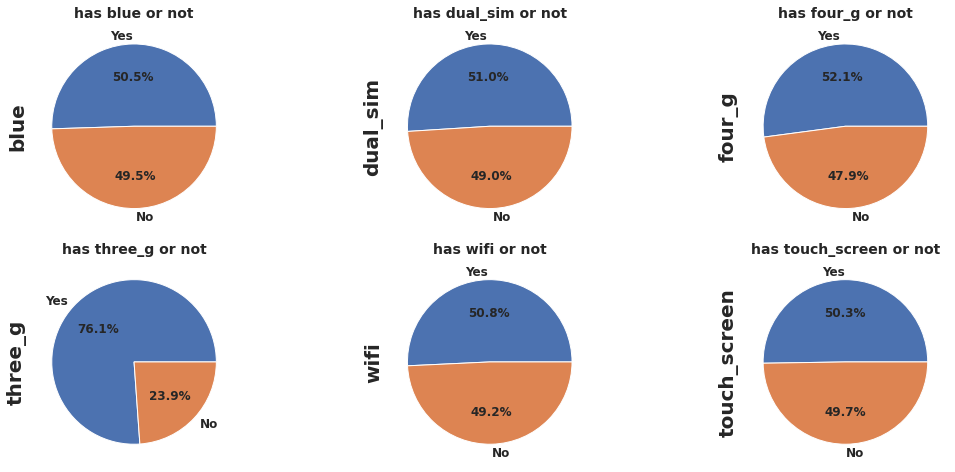

In [ ]:
# Chart - 3 visualization code
# Plotting the piecharts for binary categorical variables.
plt.figure(figsize=(15,10))

rows=3
col=3
count=1
var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
for var in var_list:
  plt.subplot(rows,col,count)
  mobile_df[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,labels=labels)
  plt.title(f'has {var} or not',fontsize=14)
  plt.tight_layout()
  count=count+1

##### 1. Why did you pick the specific chart?

The area covered in a circle with different colours makes it simple to explain the percentage comparison.When comparing percentages, a pie chart is frequently used.

##### 2. What is/are the insight(s) found from the chart?

From the above graph we can see,
1. 1 means it has the specifications.
2. 0 means it do not have the specifications.
3. Percentage Distribution of Mobiles having bluetooth,dual sim, 4G,wifi and touchscreen are almost 50 %.
4. Very few mobiles(23.8%) do not have Three_g.

#### Chart - 4 **Relation Between RAM,Battery_power,px_height and px_width**

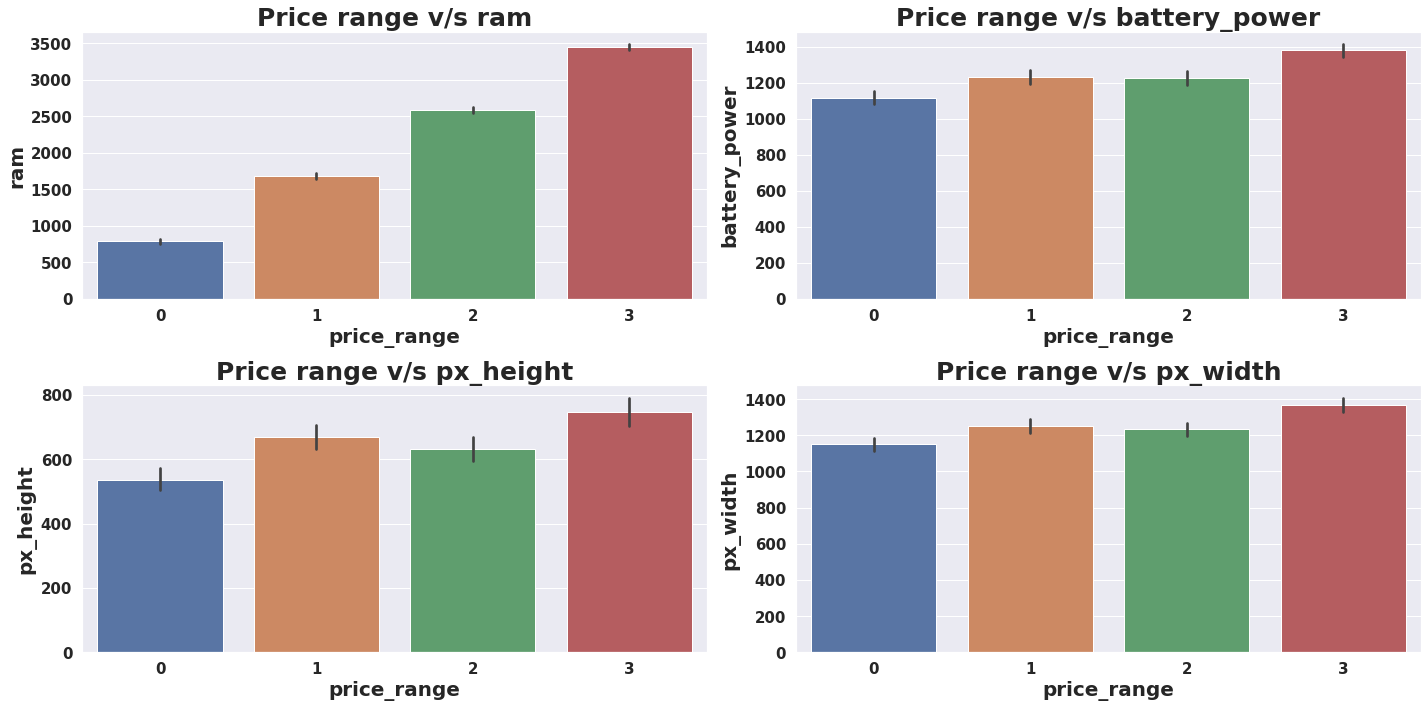

In [ ]:
# Chart - 4 visualization code
# plotting  price_range vs other fearures
plt.figure(figsize=(20,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2   
cols=2
counter=1

variables=['ram','battery_power','px_height','px_width']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=mobile_df['price_range'],y=mobile_df[var])
  plt.title(f'Price range v/s {var}')
  counter=counter+1
  plt.tight_layout()

##### 1. What is/are the insight(s) found from the chart?

Mobiles having RAM more than 3000MB falls under Very high cost category.As RAM 

*   Mobiles having RAM more than 3000MB falls under Very high cost category.As RAM increases price range also increases.

*   Mobiles having RAM less than 1000 MB falls under low cost category.
*   Mobiles with battery power more than 1300 mAh has very high cost. And Mobiles with battery power between 1200 and 1300 mAH falls under medium and high cost category.

*  Mobiles with more than 700 pixel height and width more than 1300 has very high cost.

#### Chart - 5

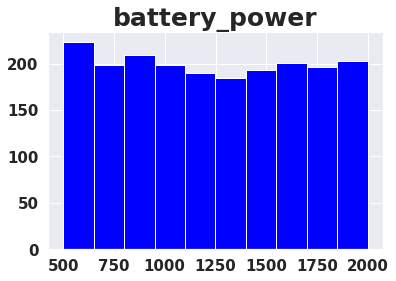

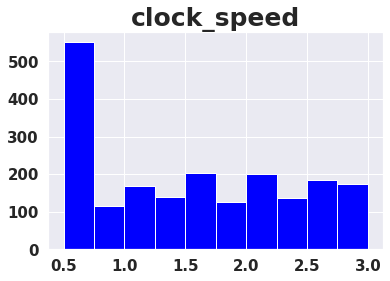

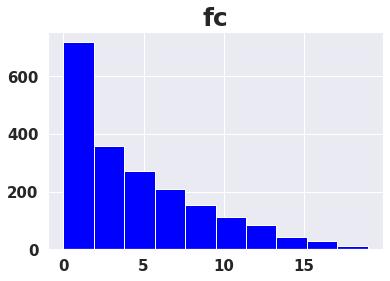

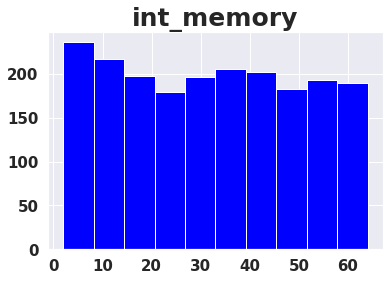

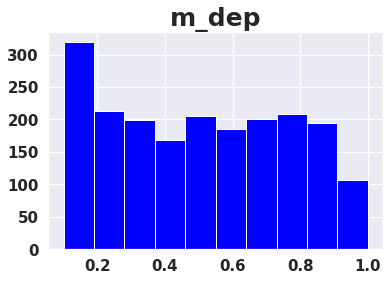

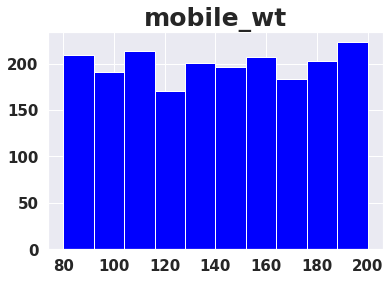

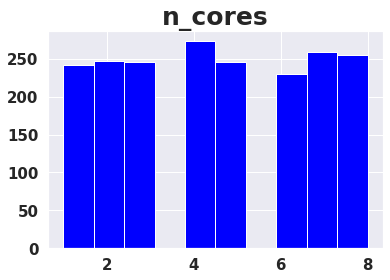

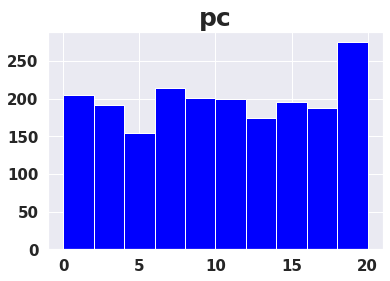

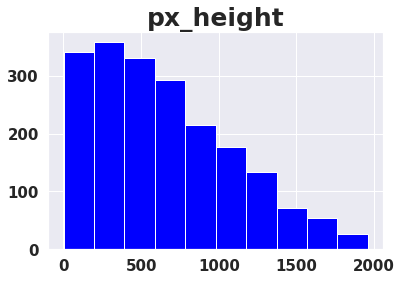

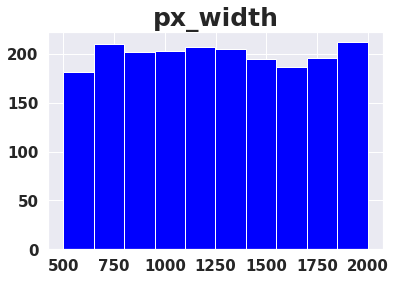

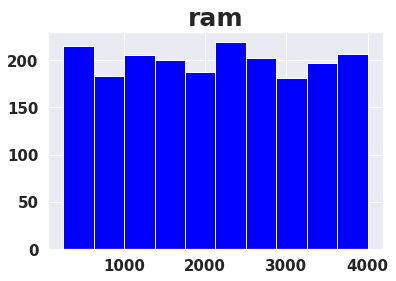

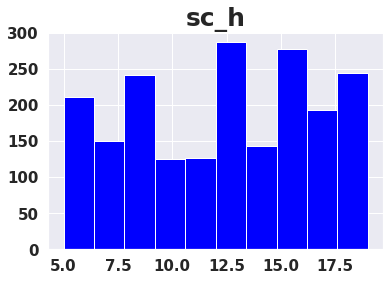

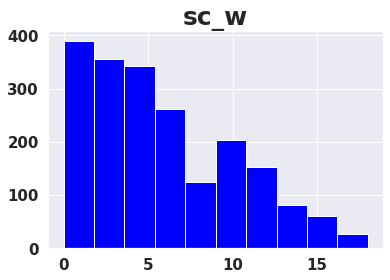

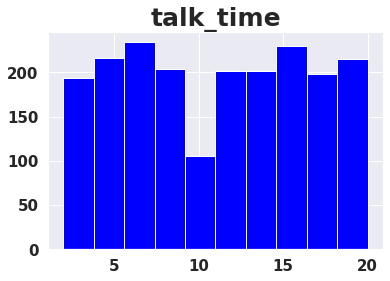

In [ ]:
# Chart - 5 visualization code
for i in mobiledata_num.columns:
    plt.hist(mobile_df[i],color='blue')
    plt.title(i)
    plt.show()

##### 1. Why did you pick the specific chart?

A histogram is a visual representation of a dataset's distribution, its location, spread, and skewness; it also aids in determining whether the distribution is symmetric or skewed left or right. Furthermore, whether it is unimodal, bimodal, or multimodal. It can also highlight any outliers or data gaps.

##### 2. What is/are the insight(s) found from the chart?

A multiple histogram is a graph that uses rectangles to show the frequency of numerical data. The distribution frequency of a variable is represented by the height of a rectangle (the vertical axis) (the amount, or how often that variable appears).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Battery power approximately same four column.clock,front_cemera,px_height,sc_w speed are first increase then after decrease.

#### Chart - 6

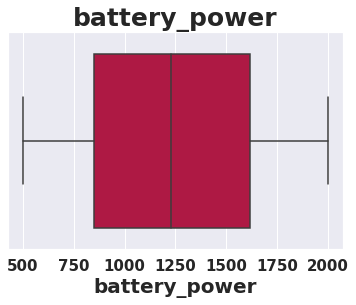

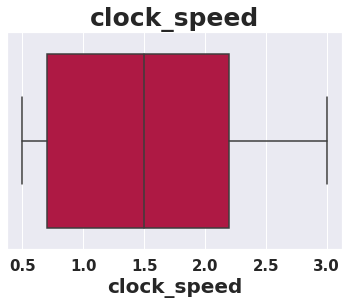

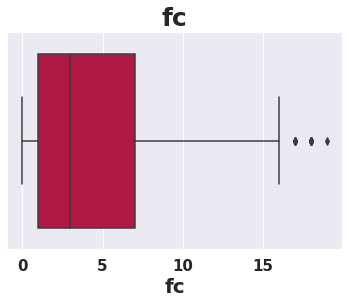

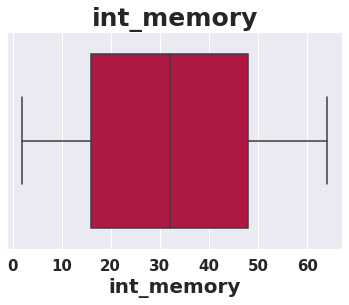

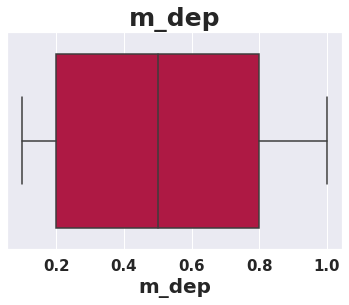

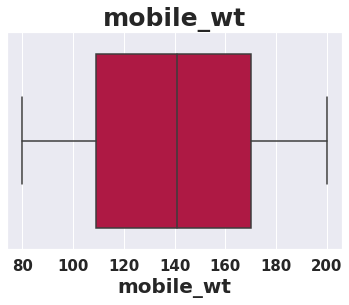

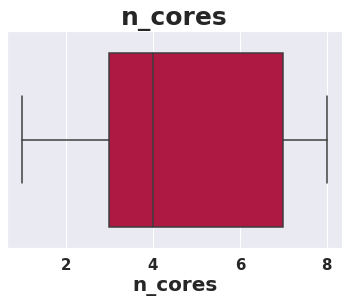

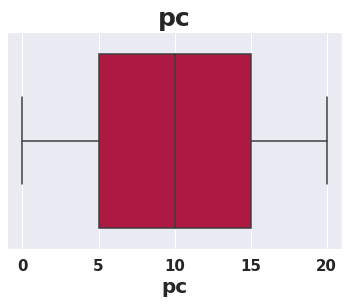

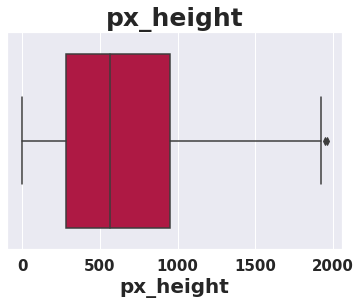

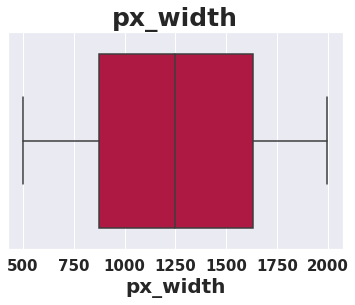

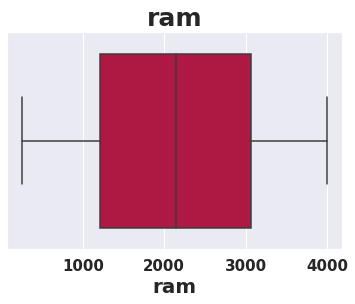

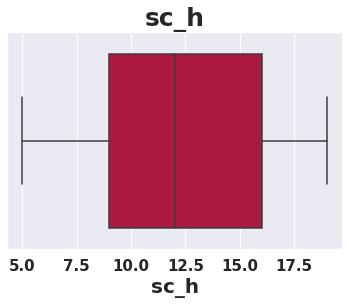

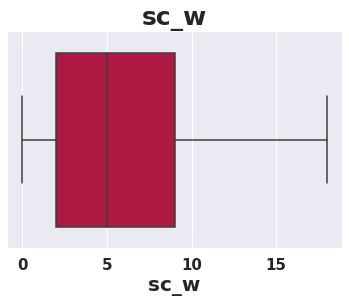

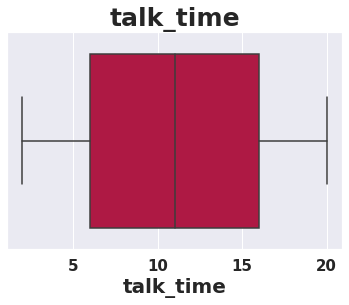

In [ ]:
# Chart - 6 visualization code
# dealing with outliers values
for i in mobiledata_num.columns:
    sns.boxplot(mobiledata_num[i],color='#C70039')
    plt.title(i)
    plt.show()

##### 1. Why did you pick the specific chart?

Box plots are used to depict the distributions of numerical data values, particularly when comparing them across multiple groups. They are designed to provide high-level information at a glance, providing general information about the symmetry, skew, variance, and outliers of a group of data.

As a result, for each numerical variable in the given dataset, I used a box plot to examine outliers and interquartile range values such as mean, median, maximum, and minimum.

##### 2. What is/are the insight(s) found from the chart?

Almost all columns are symmetrically distributed, and the mean and median for numerical columns are nearly identical. Because there are only three values in this column, area codes will be treated as text values.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Business impact cannot be defined using a box plot. It's only done to see how the column data is distributed across the dataset.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
binary_features = [ 'four_g', 'three_g']

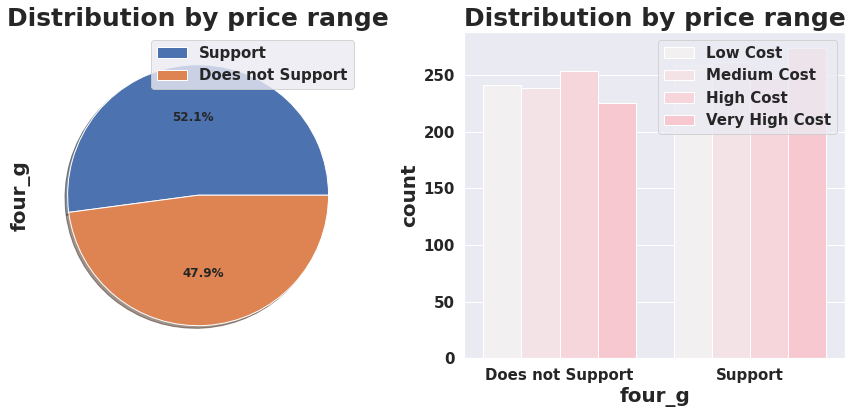

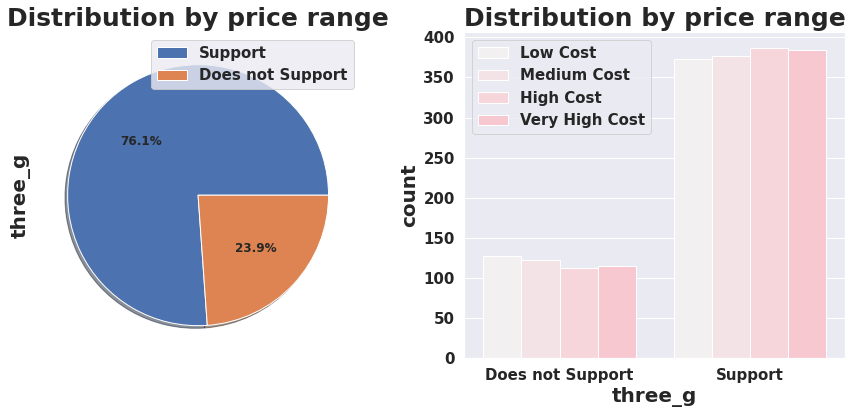

In [ ]:
# Plot of binary features against price range

for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

  mobile_df[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = mobile_df, ax = ax2, color = 'pink')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

##### 1. Why did you pick the specific chart?

Pie chart is a type of graph in which a circle is divided into sectors that each represents a proportion of the whole. Pie charts are a useful way to organize data in order to see the size of components relative to four_g and three_g variable.

Thus, I have used pie chart to show the percentage of having which one support and which one not support.

The bar graph is used to compare the items between different groups of price range. Bar graphs are used to measure the 4 variable counting the which mobile support and which mobile are not support.

##### 2. What is/are the insight(s) found from the chart?

1. three_g

   1.support=76.2%

   2.does not support=23.8

2. four_g

   1.support=52.1%

   2.does not support=47.9%



#### Chart - 8

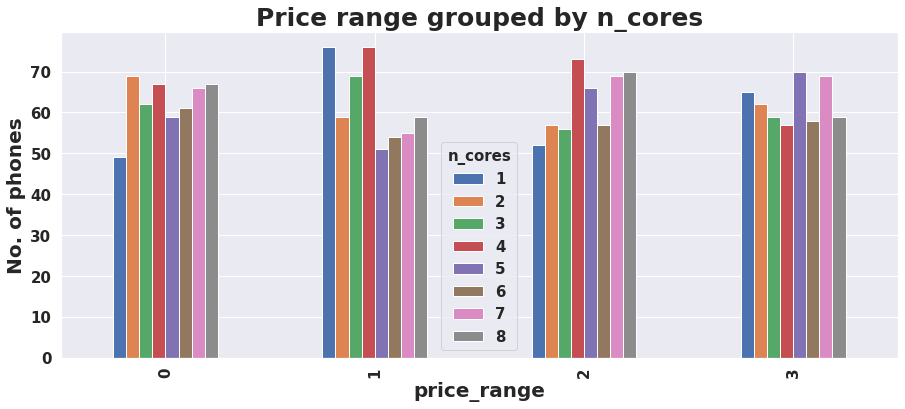

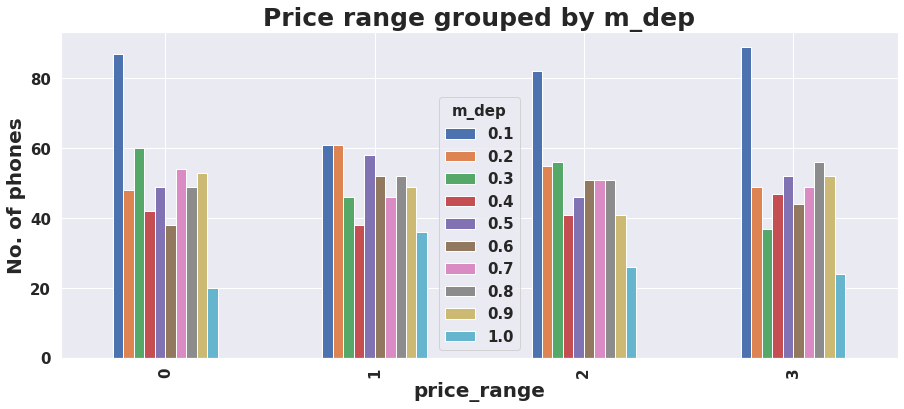

In [ ]:
# Chart - 8 visualization code
list_2=['n_cores','m_dep']
for item in list_2:
  
  mobile_df.groupby(['price_range'])[item].value_counts().unstack().plot.bar(figsize=(15,6))
  plt.title(f'Price range grouped by {item}')
  plt.ylabel('No. of phones')

##### 1. Why did you pick the specific chart?

 A bar plot can make it easy to see the differences in these values between different groups or categories of devices. Additionally, if you have more than two categories to compare, a bar plot can be more effective than a pie chart, which can become difficult to interpret when there are too many slices.

##### 2. What is/are the insight(s) found from the chart?

There are very few mobiles in price range 0 and 1 with lesser no of cores.

Most of the mobiles in price range 2 and 3 are with high no of cores.

Number of phones with less thickness is high and count of phones with high thickness is low

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
# Mobiles have both 3G and 4G specifications.
three_g_and_4g_df=mobile_df[(mobile_df['three_g']==1) & (mobile_df['four_g']==1)]

In [ ]:
three_g_and_4g_df['price_range'].value_counts()

3    274
1    261
0    259
2    247
Name: price_range, dtype: int64

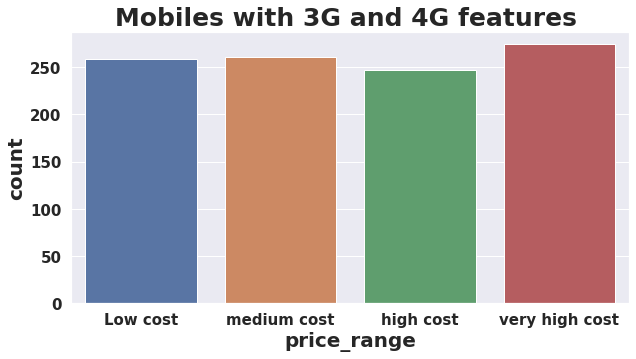

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(three_g_and_4g_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with 3G and 4G features ")
plt.show()

##### 1. What is/are the insight(s) found from the chart?

As we can see from low cost to very high cost mobiles which have both 4G and 3G feature in it.

#### Chart - 10 **Mobiles not having no 3G and 4G.**

In [ ]:
# Chart - 10 visualization code
No_3g_4G_df=mobile_df[(mobile_df['three_g']!=1) & (mobile_df['four_g']!=1)]

In [ ]:
No_3g_4G_df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
10              769     1          2.9         1   0       0           9   
19              682     1          0.5         0   4       0          19   
22             1949     0          2.6         1   4       0          47   
30             1579     1          0.5         1   0       0           5   
...             ...   ...          ...       ...  ..     ...         ...   
1981           1454     0          2.6         0   8       0           6   
1982           1784     0          1.6         0   4       0          41   
1983           1262     0          1.8         1  12       0          34   
1988           1547     1          2.9         0   2       0          57   
1989            586     0          2.8         0   2       0          15   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2   2         20       756  2549     9     7   
10      0.1        182        5   1        248       874  3946     5     2   
19      1.0        121        4  11        902      1064  2337    11     1   
22      0.3        199        4   7        407       822  1433    11     5   
30      0.2         88        7   9       1358      1739  3532    17    11   
...     ...        ...      ...  ..        ...       ...   ...   ...   ...   
1981    0.4        199        3  20        698      1018  1300    10     0   
1982    0.4        164        6  20        610      1437  2313    14     1   
1983    0.1        149        5  16        223       737  3248    13     3   
1988    0.4        114        1   3        347       957  1620     9     2   
1989    0.2         83        3  11        241       854  2592    12     8   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
10            7        0             0     0            3  
19           18        0             1     1            1  
22           20        0             0     1            1  
30           12        0             0     1            3  
...         ...      ...           ...   ...          ...  
1981          2        0             0     1            1  
1982         11        0             1     0            2  
1983          4        0             1     1            2  
1988         19        0             1     1            1  
1989          3        0             0     0            1  

[477 rows x 21 columns]

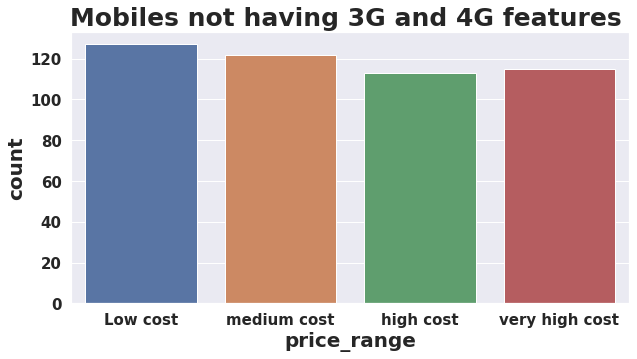

In [ ]:
# Visualization of Mobiles not having 3G and 4G features
plt.figure(figsize=(10,5))
sns.countplot(No_3g_4G_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles not having 3G and 4G features ")
plt.show()

##### 2. What is/are the insight(s) found from the chart?

*   It goes without saying that low-cost mobile phones will lack 3G and 4G capabilities.
*   5G may be available in high-end smartphones. As we all know, technology is constantly evolving.

#### Chart - 11 **No of Phones vs Camera megapixels of front and primary camera**

Text(0.5, 0, 'MegaPixels')

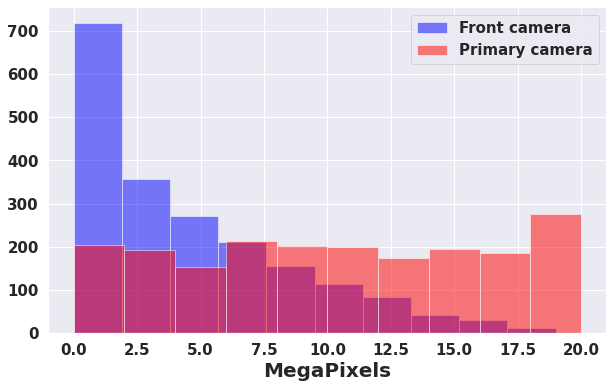

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(10,6))
mobile_df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
mobile_df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

##### 1. Why did you pick the specific chart?

In general, a histogram can be used whenever there's a need to display a comparison of the distribution of certain numerical data in various ranges of intervals. Histogram examples can help an audience see and understand quickly and easily essential meanings and patterns related to a large amount of data.

##### 2. What is/are the insight(s) found from the chart?

There are two kinds of mega pixels. The first is the front camera, and the second is the primary camera. The primary camera is red, while the front camera is blue.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

A histogram's main advantages are its simplicity and versatility. It can be applied in a variety of situations to provide an insightful look at frequency distribution. It can be used in sales and marketing, for example, to create the most effective pricing plans and marketing campaigns.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
#checking the co_relation of dataset
corr = mobile_df.corr()
corr.shape

(21, 21)

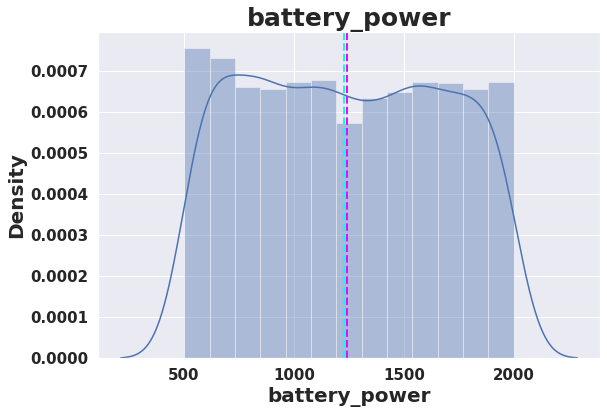

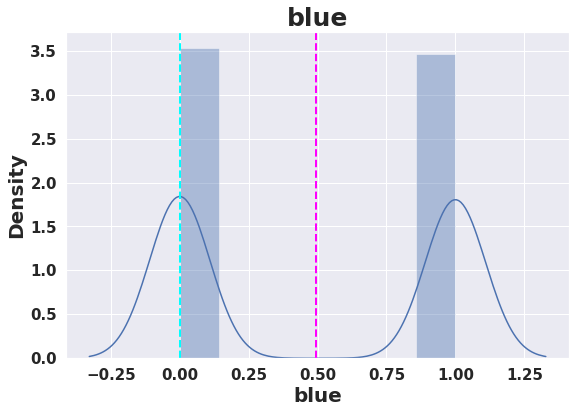

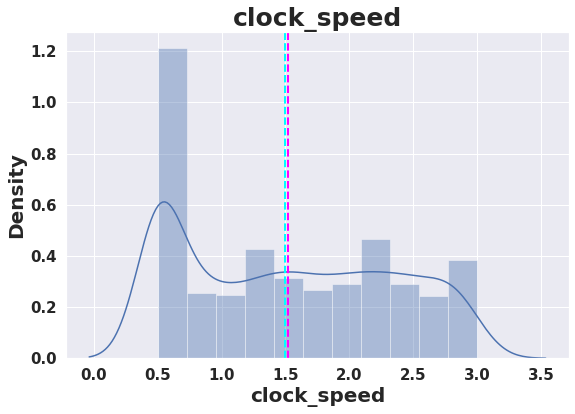

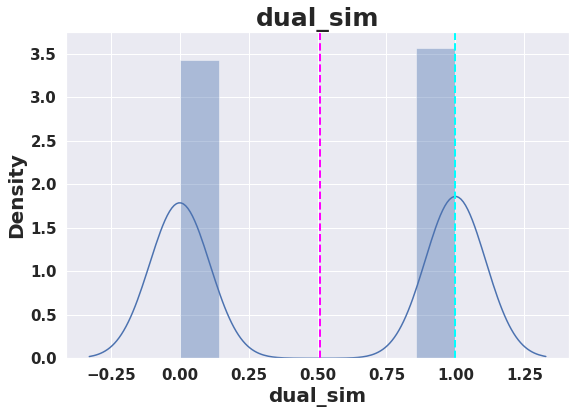

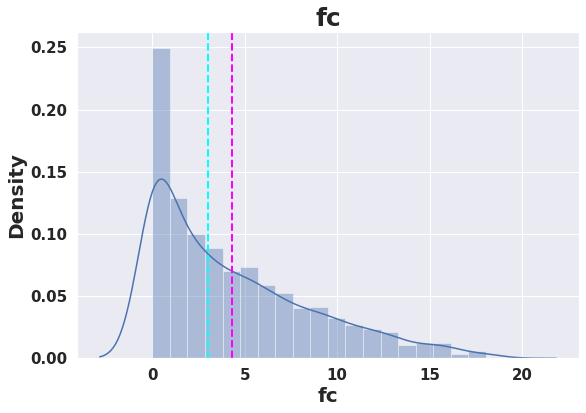

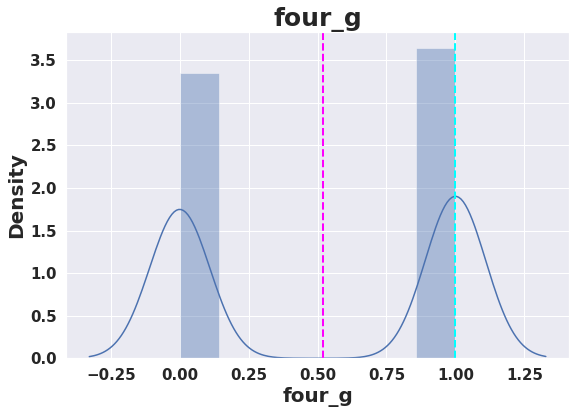

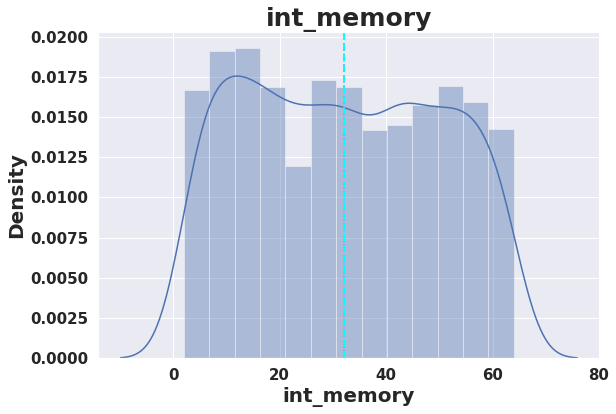

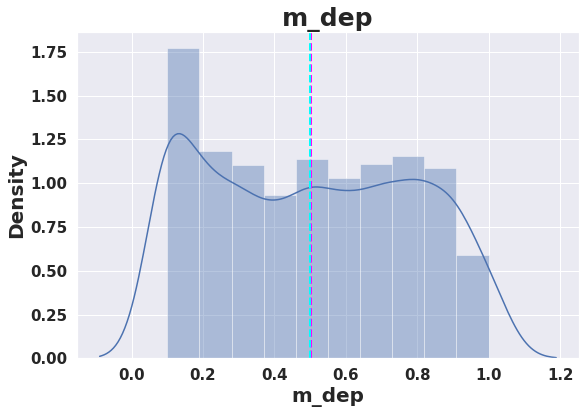

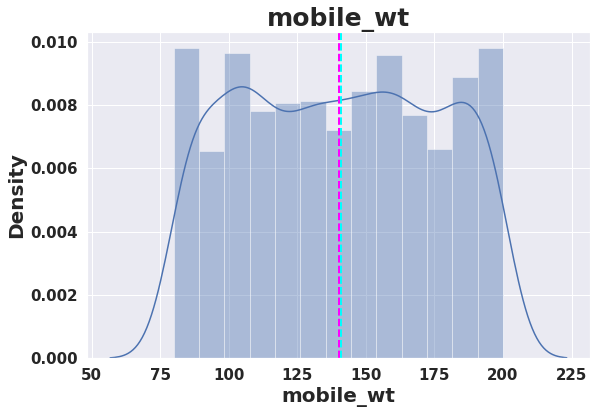

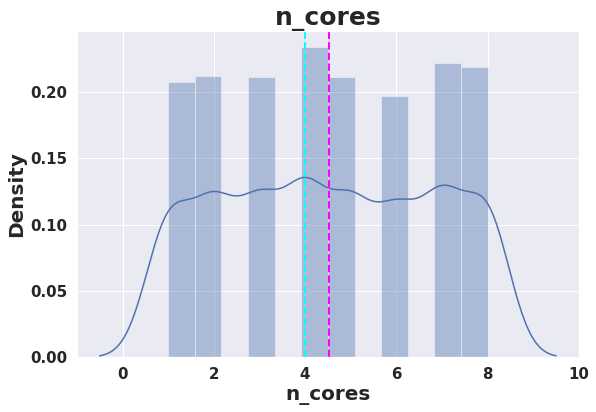

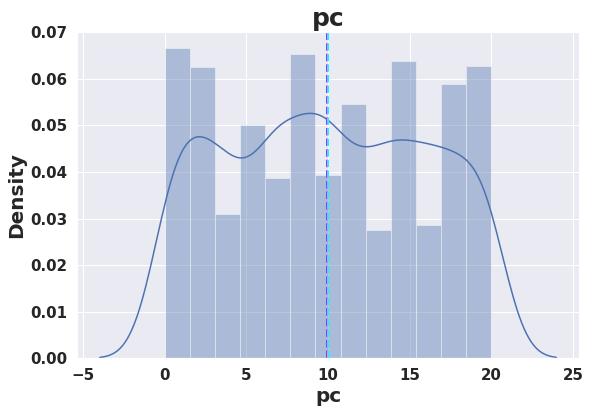

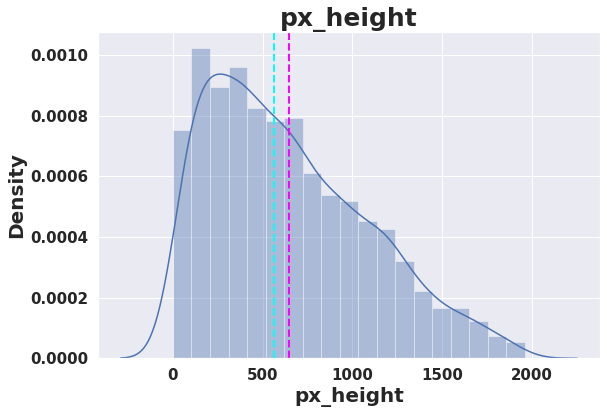

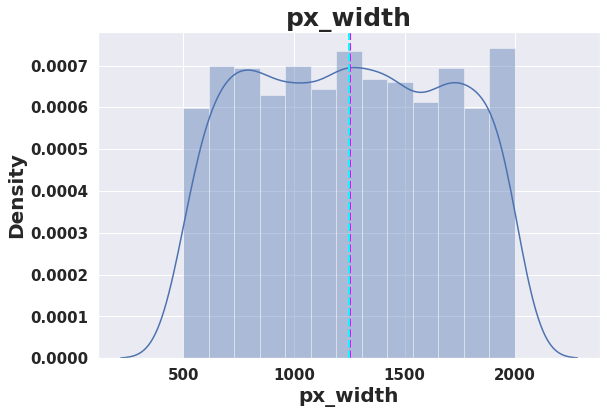

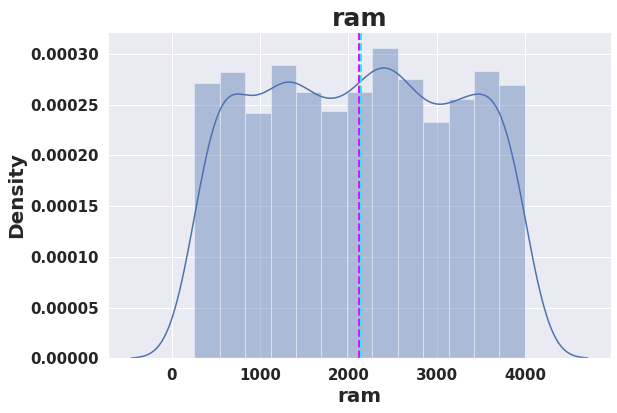

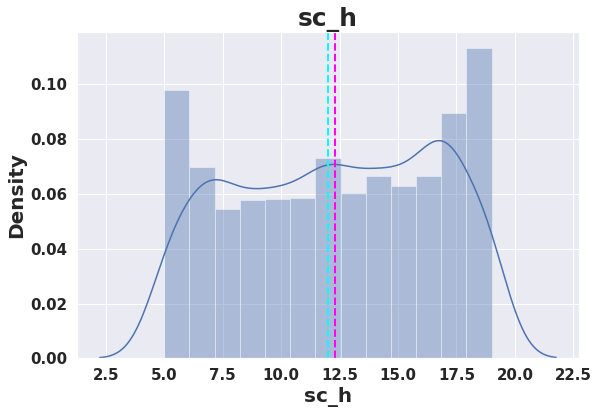

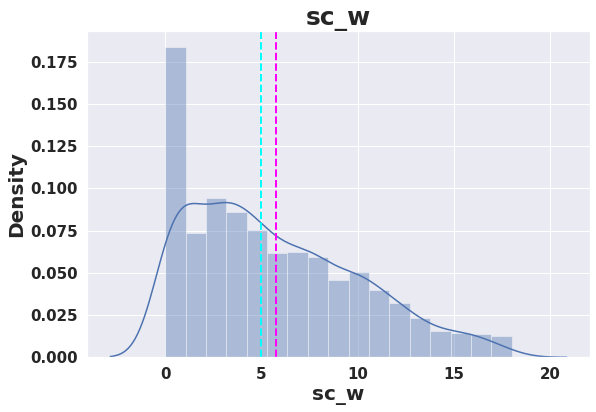

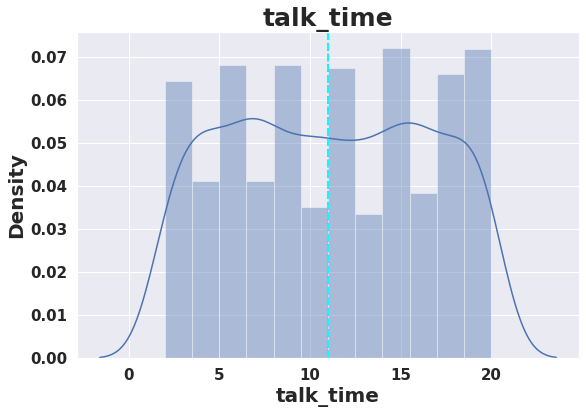

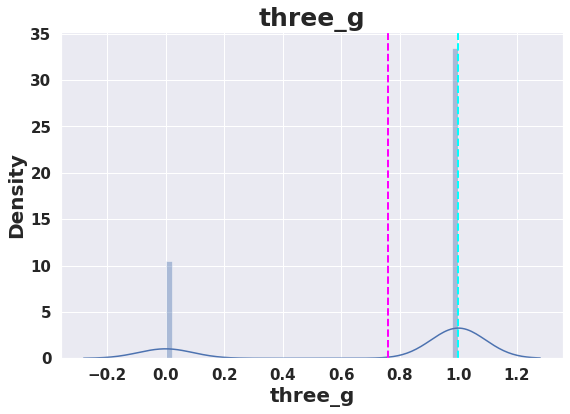

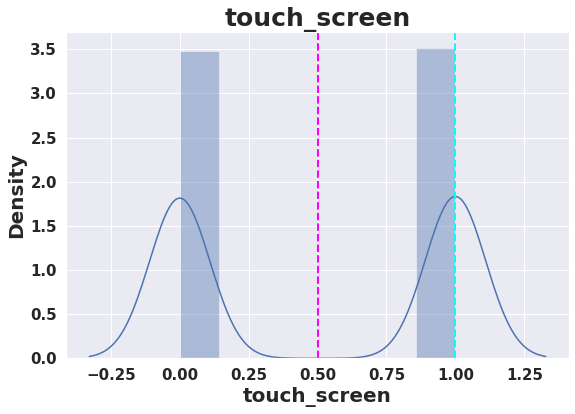

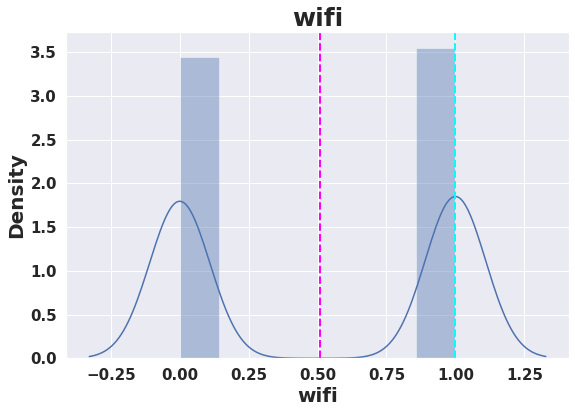

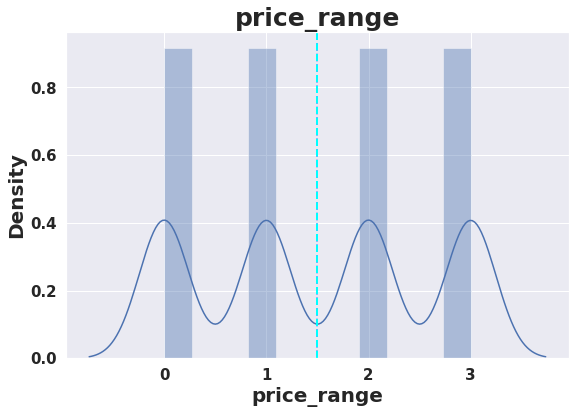

In [ ]:
# Visualizing code of hist plot for each columns to know the data distibution
for col in mobile_df.describe().columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (mobile_df[col])
  sns.distplot(mobile_df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

The distplot plots the univariate data distribution, i.e. the data distribution of a variable against the density distribution. The data variable is passed to the seaborn. distplot() function, which returns a plot with the density distribution.

##### 2. What is/are the insight(s) found from the chart?

In this graph the dataset have all column check the dencity and mean and median and the mean colour is magenta and median colour is cyan.

#### Chart - 13 **Correlation Heatmap visualization code**

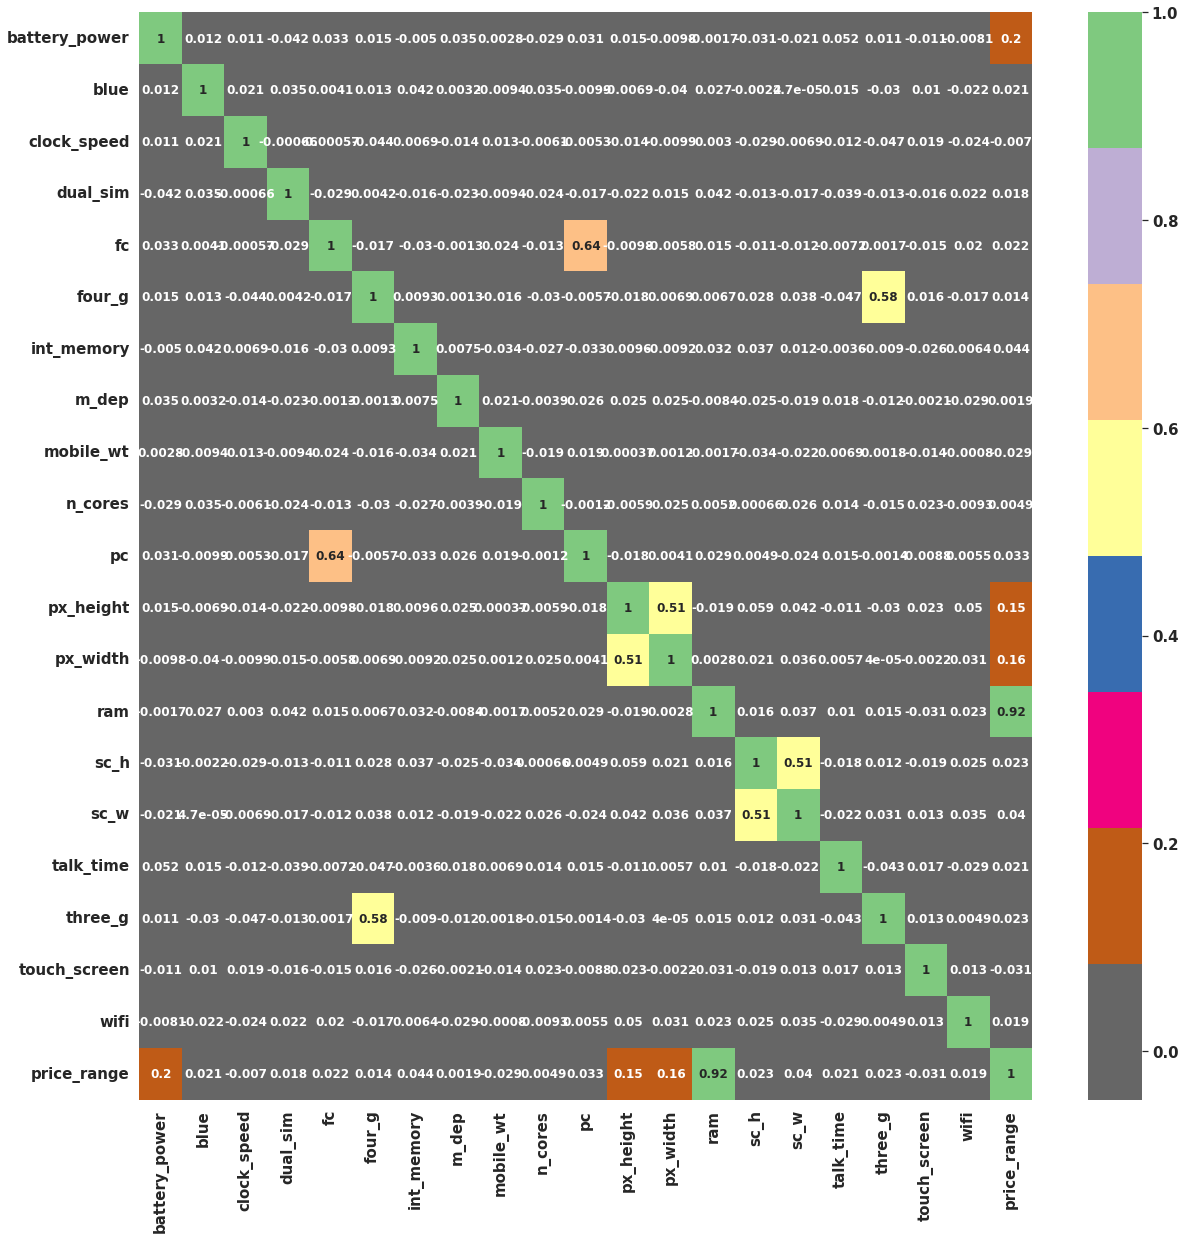

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,20))
sns.heatmap(mobile_df.corr(),annot=True,cmap=plt.cm.Accent_r)
plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coefficients, i used correlation heatmap

##### 2. What is/are the insight(s) found from the chart?

From the above correlation heatmap, 
1. We can see total price range are positiveliy highly correlated with a value of 1.

2. We can see total ram are correlated with a value of 92%.

3. We can see total pc and fc are correlated with a value of 65%.

4. Price range is positively correlated only with all features and negative correlated with rest variables.

5. Rest all correlation can be depicted from the above chart.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 15 - Pair Plot 

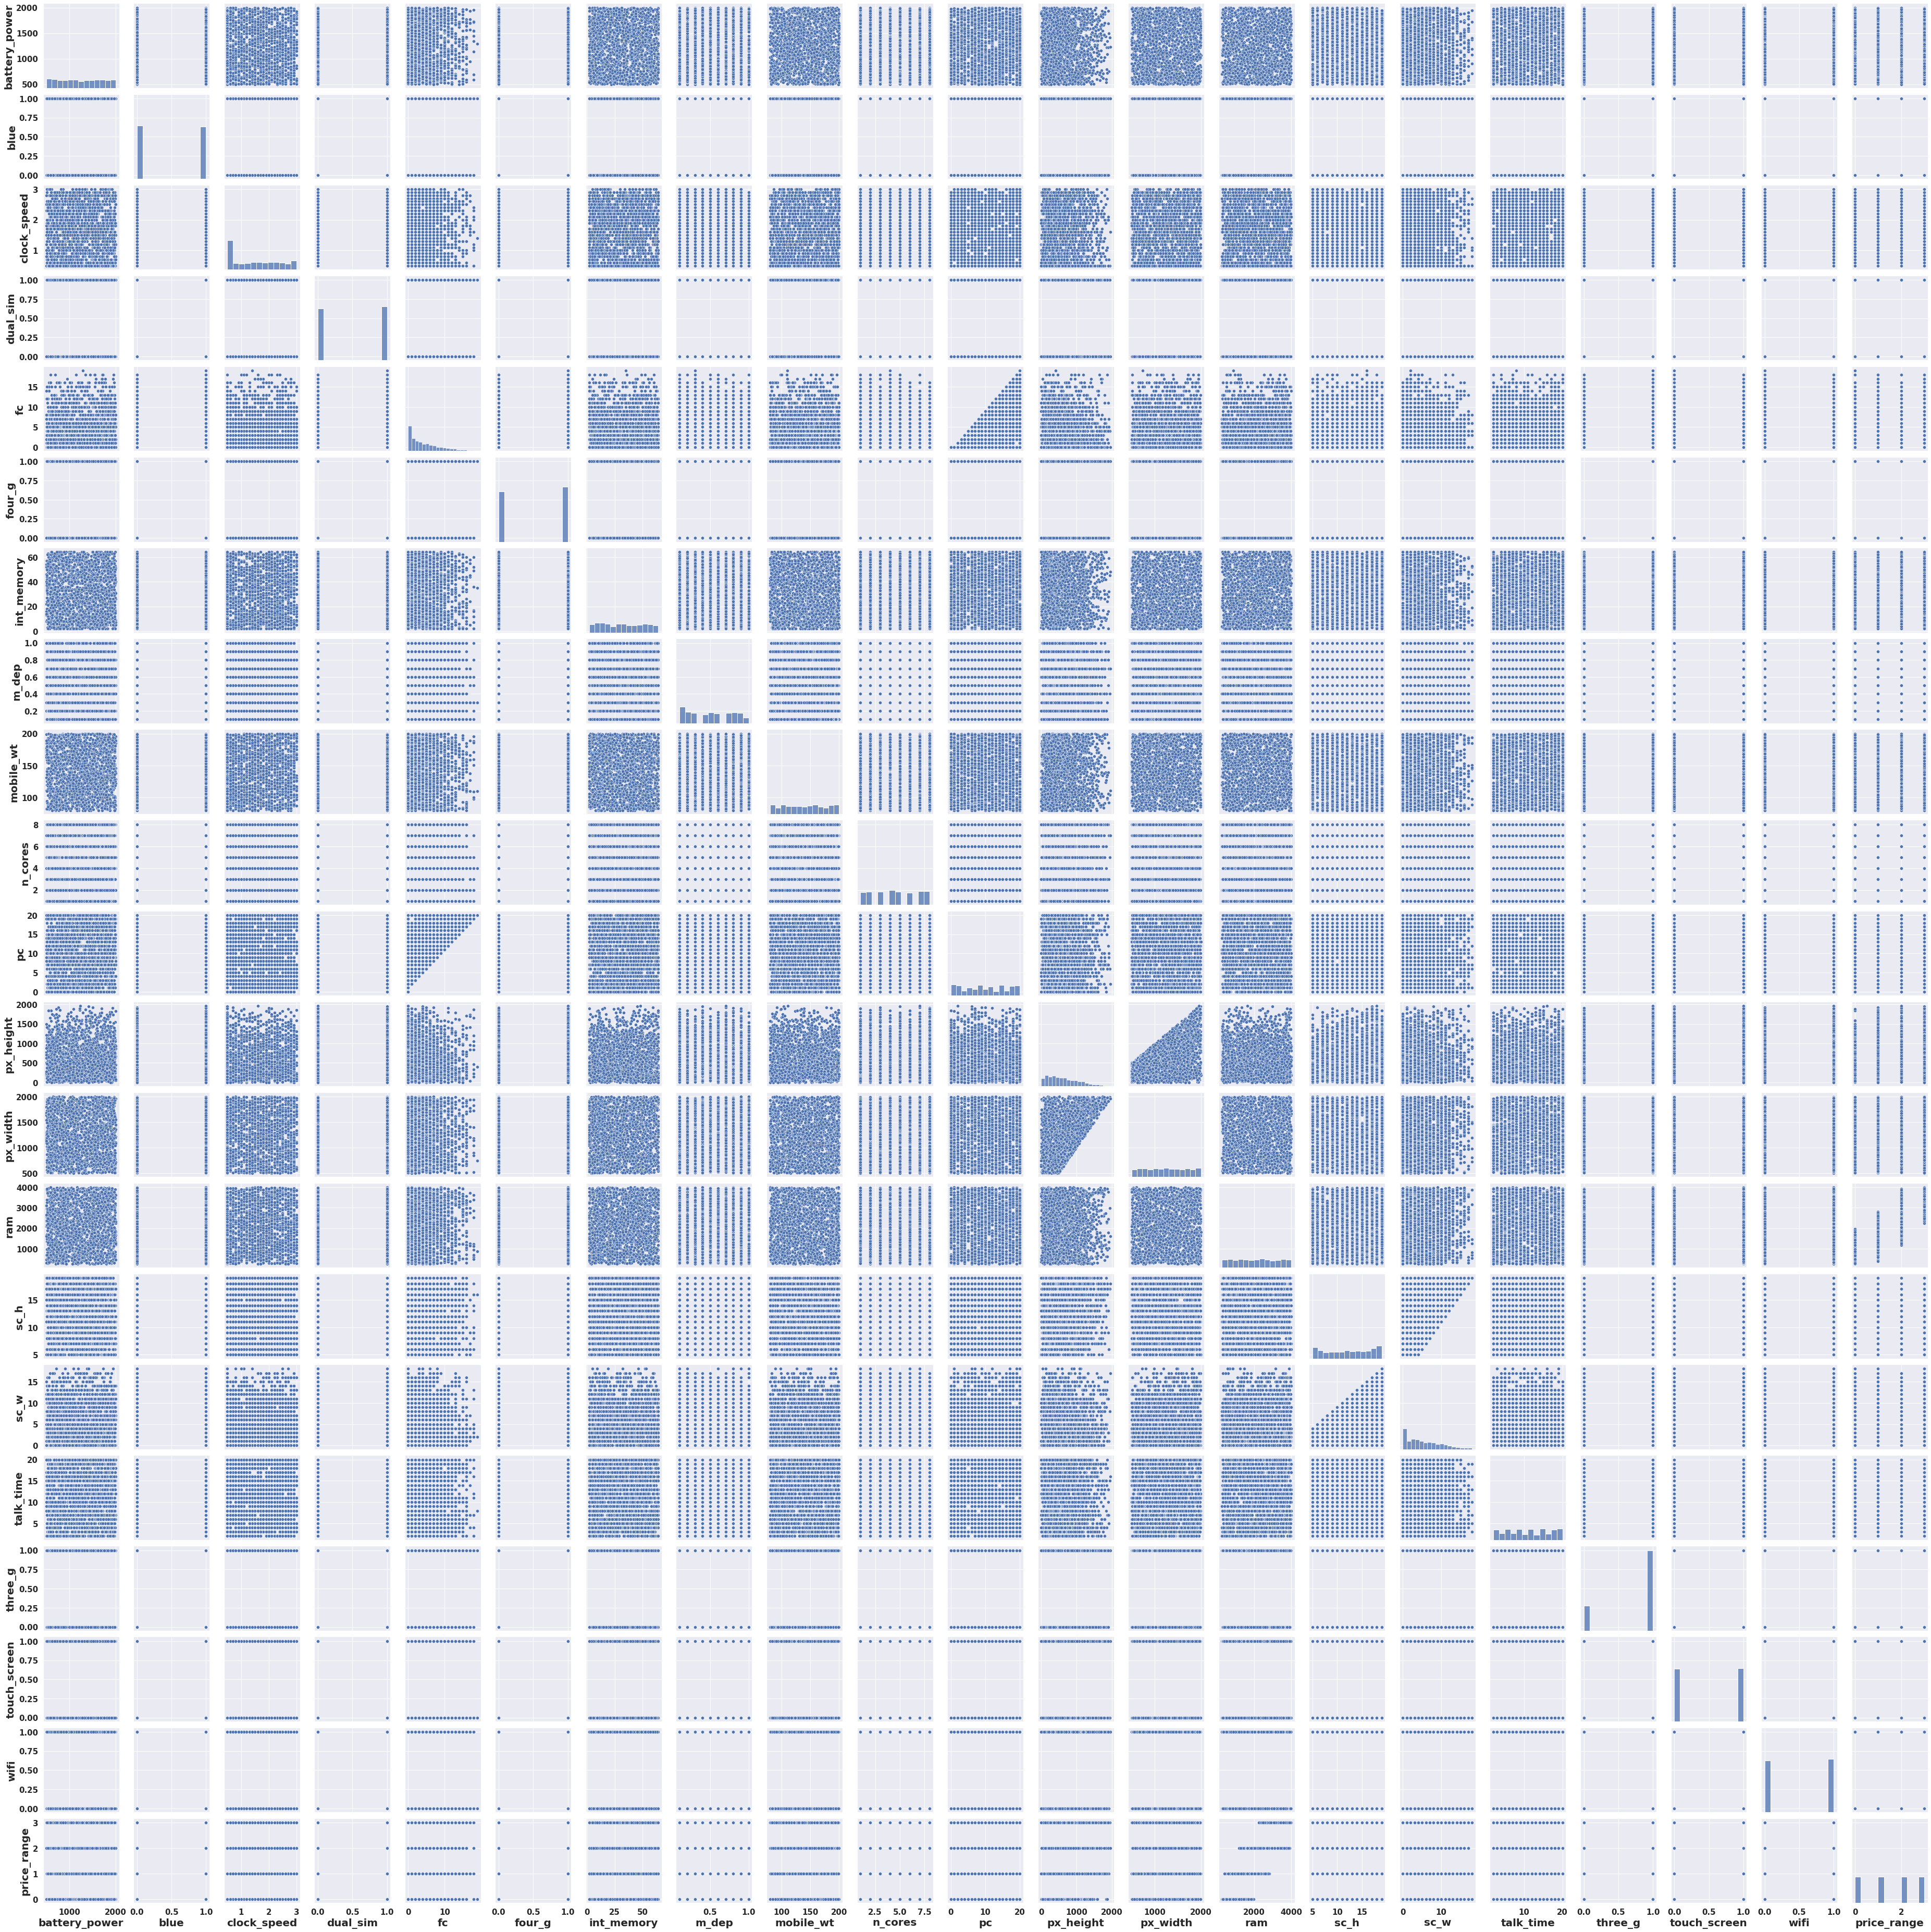

In [ ]:
# Pair Plot visualization code
sns.pairplot(mobile_df)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plots are used to determine the best set of features to explain a relationship between two variables or to form the most distinct clusters. It also helps to form some simple classification models in our data-set by drawing some simple lines or making linear separation.

As a result, I used a pair plot to examine the data patterns and relationships between the features. It's the same as the correlation map, but with a graphical representation.

##### 2. What is/are the insight(s) found from the chart?

According to the above chart, there is less linear relationship between variables and data points are not linearly separable. The price range for mobile phones is restricted. Some of the above features, such as RAM, internal memory, processors, and so on, are linearly dependent on price range.

# **5. Solution to Business Objective**

**What do you suggest the client to achieve Business Objective ?**

Here are a few strategies you can choose from when determining your prices:

1. Price based on value. ...

2. Price based on perception. ...

3. Price with the trend. ...

4. Know how to raise or lower prices. ...

5. Use the high-low strategy to attract customers. ...

# **Starting wih Machine Learning algorithim**

## **Feature Selection with hypothesis test**

Chi-test : It helps to figure-out the relation between features and label with "pvalue <= 0.1"

In [ ]:
ct = pd.crosstab(mobile_df['wifi'],mobile_df['price_range'])
from scipy.stats import chi2_contingency
stat,pvalue,dof,expected_R = chi2_contingency(ct)
print("pvalue : ",pvalue)

if pvalue <= 0.1:
    print("Alternate Hypothesis passed. int_memory and price_range have Relationship")
else:
    print("Null hypothesis passed. int_memory and price_range doesnot have  Relationship")

pvalue :  0.8214777499726995
Null hypothesis passed. int_memory and price_range doesnot have  Relationship


In [ ]:
#  defining new variable for pixels

mobile_df['pixels'] = mobiledata_num['px_height']*mobiledata_num['px_width']
# Dropping px_height and px_width

mobile_df.drop(['px_height', 'px_width'],axis=1,inplace=True)

In [ ]:
# Defining X and y
x = mobile_df.drop(['price_range'], axis = 1).values
y = mobile_df['price_range'].values

In [ ]:
x.shape

(1998, 19)

In [ ]:
y.shape

(1998,)

In [ ]:
#importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Scaling values of X
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

### 8. Data Splitting, Training and Testing

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#separate the dataset in two type one trainingis 75% of data and other testing is 25% of data
#from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.25, random_state=167)
print(x_train.shape)
print(x_test.shape)

(1498, 19)
(500, 19)


## ***7. ML Model Implementation***

In [ ]:
#importing all libraries
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score, roc_auc_score,accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

We will use a variety of algorithms and compare them all. Which algorithm will produce the best results? The algorithms are listed below.

1. Logistic Regression

2. k_nearest neighbours

3. Naive bayes theorm

4. Support vector classification(SVM)

5. DecisionTree Classifier

6. RandomForest Classifier

7. XGB boostclassifier

**Metrics that can provide better insight are:**

**Confusion Matrix** : a table showing correct predictions and types of incorrect predictions.

**Precision** : the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.

**Recall** : the number of true positives divided by the number of positive values in the test data. The recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.

**F1 Score** : the weighted average of precision and recall.

**Area Under ROC Curve (AUC-ROC)** : AUC-ROC represents the likelihood of your model distinguishing observations from two classes. In other words, if you randomly select one observation from each class, what’s the probability that your model will be able to “rank” them correctly?

### ML Model - 1 **Implementing Logistic Regression**

In [ ]:
# Applying logistic regression
logmodel= LogisticRegression()  
logmodel.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Checking the coefficients
logmodel.coef_

array([[-3.18772980e+00,  5.38488830e-02,  1.20743044e-01,
        -1.72801917e-02, -2.95111045e-01, -4.50625279e-02,
        -2.45713121e-01, -1.20880933e-01,  3.37564400e-01,
         8.62386053e-02, -1.03620569e-02, -1.35095653e+01,
         4.04542343e-02, -5.24236051e-02, -2.47847794e-01,
        -1.06418698e-01,  4.29705269e-02,  5.74402958e-02,
        -3.83238544e+00],
       [-8.70430921e-01, -3.98786953e-02, -2.87451987e-02,
         2.39611363e-02,  1.10590758e-01, -2.85095215e-02,
         1.07724796e-01,  1.58012570e-01,  2.85871747e-01,
        -3.14430427e-01, -1.69305958e-02, -3.79142544e+00,
         7.48632192e-02, -2.51446832e-01,  1.05365101e-01,
         5.77875818e-02,  7.14840142e-02,  3.21756571e-02,
        -7.40023029e-01],
       [ 8.27765345e-01,  1.27772325e-02, -4.84015355e-02,
        -1.30424688e-01,  1.05214502e-01, -1.08776626e-01,
        -2.76907625e-01, -8.77928114e-02,  9.74164497e-02,
         1.33453986e-01, -9.59012364e-02,  4.00432926e+00,
    

In [ ]:
# Checking the intercept value
logmodel.intercept_

array([  8.13164647,   3.42720584,  -1.0830164 , -10.47583591])

train score: 0.9145527369826435 

test score: 0.896 

 f1 score:  0.8960000000000001 

[[124   5   0   0]
 [  6  99  14   0]
 [  0   8 100  10]
 [  0   0   9 125]]


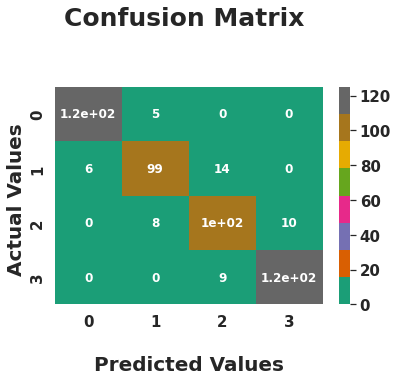

In [ ]:
# Predict on the model
# Get the predicted probabilities
trainscore =  logmodel.score(x_train,y_train)
testscore =  logmodel.score(x_test,y_test)  

print("train score: {}".format(trainscore),'\n')
print("test score: {}".format(testscore),'\n')
y_predlogi =  logmodel.predict(x_test)
print(' f1 score: ',f1_score(y_test, y_predlogi,average='micro'),'\n')

# Get the confusion matrix for both train and test
log_matrix=confusion_matrix(y_test, y_predlogi)
print(log_matrix)

ax = sns.heatmap(log_matrix, annot=True, cmap='Dark2')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(' precision score: ',precision_score(y_test, y_predlogi,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predlogi,average='micro'),'\n')
print(classification_report(y_test, y_predlogi))

 precision score:  0.896 

 recall score:  0.896 

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       129
           1       0.88      0.83      0.86       119
           2       0.81      0.85      0.83       118
           3       0.93      0.93      0.93       134

    accuracy                           0.90       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.90      0.90      0.90       500



In [ ]:
# LogisticRegression
probabilityValues = logmodel.predict_proba(x)
auc = roc_auc_score(y,probabilityValues,multi_class ='ovr')
print(auc)

0.9875535909847004


Finally we made result in logistic regression !!

1. I built the model using logistic regression. So, the next step is to try to improve the score by using the hyperparameter tuning technique.

2. The training score is 91%, and the testing score is 90%.

3. For the testing dataset, I discovered precision of 90%, recall of 90%, and a f1-score of 90%. But I'm also curious to see the results for the mobile price range.

    a. I received a low(0) price precision of 95%, a recall of 96%, and a f1-score of 96%.

    b. I received a medium(1) price precision of 88%, a recall of 83%, and a f1-score of 86%.

    c. I received a High(2) price precision of 81%, a recall of 85%, and a f1-score of 83%.

    d. I obtained a very high (3) price precision (93%), recall (93%), and f1-score (93%).

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param={'C':[0.01,0.1,1,10,100,110,120,130]}
grid=GridSearchCV(LogisticRegression(max_iter=500),param,n_jobs=-1)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 110, 120, 130]})

train score: 0.9526034712950601 

test score: 0.926 

 f1 score:  0.926 

[[125   4   0   0]
 [  4 105  10   0]
 [  0   3 106   9]
 [  0   0   7 127]]


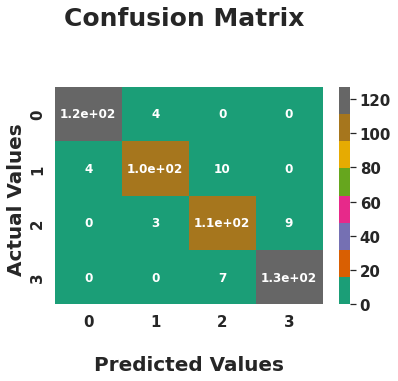

In [ ]:
# Predict on the model
# Get the predicted classes
trainscore =  grid.score(x_train,y_train)
testscore =  grid.score(x_test,y_test)  

print("train score: {}".format(trainscore),'\n')
print("test score: {}".format(testscore),'\n')
y_pred_cross_logi =  grid.predict(x_test)
print(' f1 score: ',f1_score(y_test, y_pred_cross_logi,average='micro'),'\n')
log_cross_matrix=confusion_matrix(y_test, y_pred_cross_logi)
print(log_cross_matrix)


ax = sns.heatmap(log_cross_matrix, annot=True, cmap='Dark2')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(' precision score: ',precision_score(y_test, y_pred_cross_logi,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_pred_cross_logi,average='micro'),'\n')
print(classification_report(y_test, y_pred_cross_logi))

 precision score:  0.926 

 recall score:  0.926 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       129
           1       0.94      0.88      0.91       119
           2       0.86      0.90      0.88       118
           3       0.93      0.95      0.94       134

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.92       500
weighted avg       0.93      0.93      0.93       500



#####What hyperparameter optimization technique did you employ, and why? 

GridSearchCV employs the Grid Search technique to find the best hyperparameters to improve model performance.

Our goal should be to find the best hyperparameter values for our model in order to get the best prediction results. However, the question of how to find the best sets of hyperparameters arises. The Manual Search method can be used to find the best hyperparameters by using a hit and trial process, which would take a long time to build a single model.

As a result, methods such as Random Search and GridSearch were developed. Grid Search calculates the performance for each combination of all the specified hyperparameters and their values and selects the best value for the hyperparameters. Based on the number of hyperparameters involved, this makes processing time-consuming and costly.

GridSearchCV performs cross-validation in addition to Grid Search. When training the model, cross-validation is used.

As a result, I used the GridsearCV method for hyperparameter optimization.

### Have you noticed any progress? 
### Take note of the progress with the updated Evaluation metric Score Chart.

The training score is 95%, while the testing score is 92%.

For testing dataset,

a. I got low(0) price precision 97% of and recall of 97% and f1-score of 97%.

b. I got medium(1) price precision 94% of and recall of 88% and f1-score of 91%.

c. I got High(2) price precision 86% of and recall of 90% and f1-score of 88%.

d. I got very high(3) price precision 93% of and recall of 95% and f1-score of 94%.

### ML Model - 2 **Implementing K_nearest neighbours(knn)**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,100)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(x_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test) 

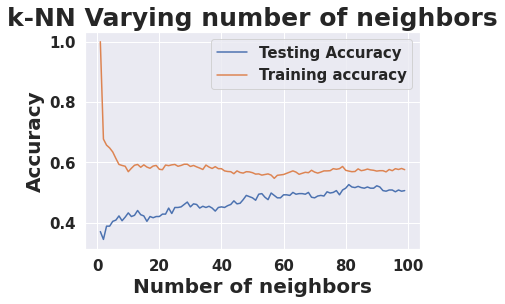

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=5)
# Fit the model
knn.fit(x_train,y_train)

KNeighborsClassifier()

train score: 0.6341789052069426 

test score: 0.404 

 f1 score:  0.404 

[[75 38 12  4]
 [42 42 25 10]
 [26 39 44  9]
 [11 31 51 41]]


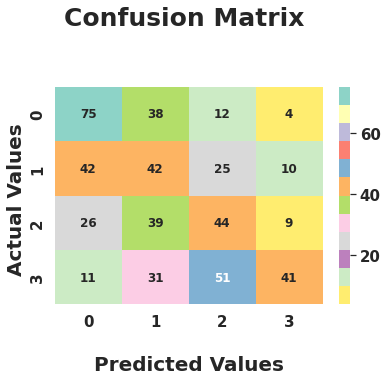

In [ ]:
# Predict on the model
# Get the predicted classes
trainscore =  knn.score(x_train,y_train)
testscore =  knn.score(x_test,y_test)  

print("train score: {}".format(trainscore),'\n')
print("test score: {}".format(testscore),'\n')
y_predknn =  knn.predict(x_test)
print(' f1 score: ',f1_score(y_test, y_predknn,average='micro'),'\n')
knn_matrix=confusion_matrix(y_test, y_predknn)
print(knn_matrix)

ax = sns.heatmap(knn_matrix, annot=True, cmap='Set3_r')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(' precision score: ',precision_score(y_test, y_predknn,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predknn,average='micro'),'\n')
print(classification_report(y_test, y_predknn))

 precision score:  0.404 

 recall score:  0.404 

              precision    recall  f1-score   support

           0       0.49      0.58      0.53       129
           1       0.28      0.35      0.31       119
           2       0.33      0.37      0.35       118
           3       0.64      0.31      0.41       134

    accuracy                           0.40       500
   macro avg       0.44      0.40      0.40       500
weighted avg       0.44      0.40      0.41       500



In [ ]:
# K_neigbours classifier
probabilityValues = knn.predict_proba(x)
auc = roc_auc_score(y,probabilityValues,multi_class ='ovr')
print(auc)

0.8145858005031403


Finally, we achieved a result in the Knn classifier!!

1.To create the model, I used the knn classifier. As a result of my poor performance.


2.The training score is 63%, and the testing score is 40%.

3.For the testing dataset, I discovered precision of 40%, recall of 40%, and a f1-score of 40%. However, I am also curious to see the results for the mobile price range.

     a.I received a low(0) price precision of 49%, a recall of 58%, and a f1-score of 33%.

     b.I obtained a medium(1) price precision of 28%, recall of 35%, and a f1-score of 31%.

     c.I received a High(2) price precision of 33%, a recall of 37%, and a f1-score of 35%.

     d.I obtained a very high(3) price precision of 64%, recall of 31%, and f1-score of 41%.

### ML Model - 3 **Implementing Naive Bayes Classifier**

In [ ]:
# ML Model - 3 Implementation
#apply naive_bayes_classifier
NBmodel = GaussianNB()  
NBmodel.fit(x_train, y_train) 

GaussianNB()

train score: 0.8130841121495327 

test score: 0.784 

 f1 score:  0.7840000000000001 

[[117  12   0   0]
 [ 11  82  26   0]
 [  0  20  80  18]
 [  0   0  21 113]]


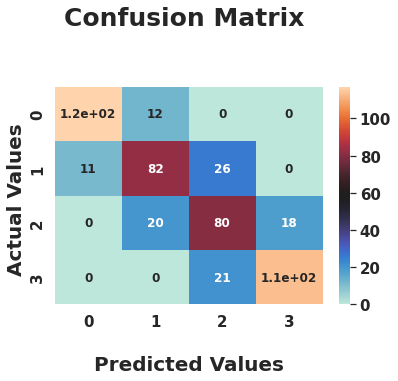

In [ ]:
# Calculate training and testing scores
trainscore = NBmodel.score(x_train,y_train)
testscore = NBmodel.score(x_test,y_test)  

# Print scores to console
print("train score: {}".format(trainscore),'\n')
print("test score: {}".format(testscore),'\n')

# Predict on the test set and calculate F1 score
y_predNB = NBmodel.predict(x_test)
print(' f1 score: ',f1_score(y_test, y_predNB,average='micro'),'\n')

# Calculate confusion matrix for the test set
naive_matrix = confusion_matrix(y_test, y_predNB)

# Print confusion matrix to console
print(naive_matrix)

# Create a heatmap of the confusion matrix using Seaborn
ax = sns.heatmap(naive_matrix, annot=True, cmap='icefire')

# Set title and axis labels
ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Set tick labels to be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

# Display the visualization of the Confusion Matrix.
plt.show()


In [ ]:
print(' precision score: ',precision_score(y_test, y_predNB,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predNB,average='micro'),'\n')
print(classification_report(y_test, y_predNB))

 precision score:  0.784 

 recall score:  0.784 

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       129
           1       0.72      0.69      0.70       119
           2       0.63      0.68      0.65       118
           3       0.86      0.84      0.85       134

    accuracy                           0.78       500
   macro avg       0.78      0.78      0.78       500
weighted avg       0.79      0.78      0.79       500



In [ ]:
# Naive Bayes Classifier
probabilityValues = NBmodel.predict_proba(x)
auc = roc_auc_score(y,probabilityValues,multi_class ='ovr')
print(auc)

0.9508356773868324


1.To create the model, I used the naive bayes algorithm. As a result, I received a poor grade.

2.For training score is 81% and testing score 78%

3.For the testing dataset, I found precision of 78%, recall of 78%, and a f1-score of 78%. However, I am also interested in the mobile price range result.

    a.I received a low(0) price precision of 91%, a recall of 91%, and a f1-score of 91%.

    b.I obtained a medium(1) price precision of 72%, recall of 69%, and a f1-score of 70%.

    c.I obtained a High(2) price precision of 63%, recall of 68%, and f1-score of 65%.

    d.I obtained a very high (3) price precision of 86%, a recall of 84%, and a f1-score of 85%.

### Model 4 - **Implementing Support Vector Machine Classifier (SVM)**

In [ ]:
#applying support vector machine classifier
svcmodel = SVC(probability=True)  
svcmodel.fit(x_train, y_train)

SVC(probability=True)

train score: 0.9552736982643525 

test score: 0.818  

 f1 score:  0.818 

[[111  18   0   0]
 [ 12  88  19   0]
 [  0  12  98   8]
 [  0   0  22 112]]


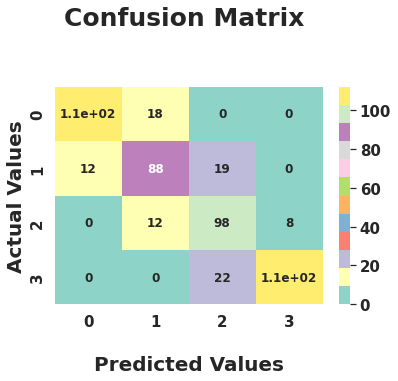

In [ ]:
# Calculate training and testing scores
trainscore = svcmodel.score(x_train,y_train)
testscore = svcmodel.score(x_test,y_test)

# Print scores to console
print("train score: {}".format(trainscore),'\n')
print("test score: {} ".format(testscore),'\n')

# Make predictions on test data
y_predsvc = svcmodel.predict(x_test)

# Calculate f1 score
print(' f1 score: ',f1_score(y_test, y_predsvc,average='micro'),'\n')

# Get confusion matrix
svm_matrix = confusion_matrix(y_test, y_predsvc)
print(svm_matrix)

# Plot confusion matrix
ax = sns.heatmap(svm_matrix, annot=True, cmap='Set3')
ax.set_title('Confusion Matrix \n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

# Set tick labels for the matrix
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

# Display the visualization of the Confusion Matrix
plt.show()


In [ ]:
print(' precision score: ',precision_score(y_test, y_predsvc,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predsvc,average='micro'),'\n')
print(classification_report(y_test, y_predsvc))

 precision score:  0.818 

 recall score:  0.818 

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       129
           1       0.75      0.74      0.74       119
           2       0.71      0.83      0.76       118
           3       0.93      0.84      0.88       134

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.83      0.82      0.82       500



In [ ]:
# Support Vector Classification (SVM) 
probabilityValues = svcmodel.predict_proba(x)
auc = roc_auc_score(y,probabilityValues,multi_class ='ovr')
print(round(auc,6))

0.992307


Finally, we achieved success in the support vector machine!!

1. I built the model with a support vector machine. As a result, I received a poor grade.

2. The training score is 95% and the testing score is 81%.

3. For the testing dataset, I discovered a precision of 81%, a recall of 81%, and a f1-score of 81%. However, I am also interested in the mobile price range result.

    a.I obtained a low(0) price precision of 90%, recall of 86%, and a f1-score of 88%.

    b.I obtained a medium(1) price precision of 75%, recall of 74%, and f1-score of 74%.

    c.I obtained a High(2) price precision of 71%, a recall of 83%, and a f1-score of 76%.

    d.I received a very high (3) price precision of 93%, recall of 84%, and f1-score of 88%.

### ML Model 5 -**Implementing Decision Tree**

In [ ]:
#Applying Decision Tree
DTmodel=  DecisionTreeClassifier(max_depth=6)  
DTmodel.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6)

train score: 0.9372496662216289 

test score: 0.854  

 f1 score:  0.854 



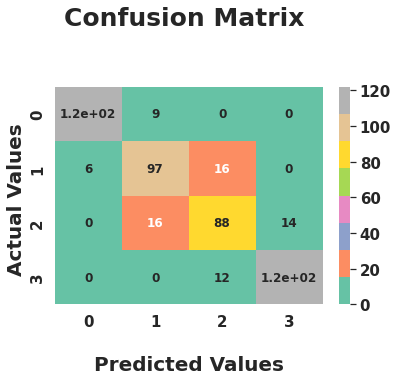

In [ ]:
# Calculate training and testing scores
trainscore =  DTmodel.score(x_train,y_train)
testscore =  DTmodel.score(x_test,y_test)

# Get the predicted values for the test data
y_predDT =  DTmodel.predict(x_test)

# Print scores to console
print("train score: {}".format(trainscore),'\n')
print("test score: {} ".format(testscore),'\n')
print(' f1 score: ',f1_score(y_test, y_predDT,average='micro'),'\n')

# Get the confusion matrix for the test data
DT_matrix=confusion_matrix(y_test, y_predDT)

# Create a heatmap of the confusion matrix
ax = sns.heatmap(DT_matrix, annot=True, cmap='Set2')

# Set title and axis labels
ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(' precision score: ',precision_score(y_test, y_predDT,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predDT,average='micro'),'\n')
print(classification_report(y_test, y_predDT))

 precision score:  0.854 

 recall score:  0.854 

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       129
           1       0.80      0.82      0.80       119
           2       0.76      0.75      0.75       118
           3       0.90      0.91      0.90       134

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



In [ ]:
# Decision Tree
probabilityValues = DTmodel.predict_proba(x)
auc = roc_auc_score(y,probabilityValues,multi_class ='ovr')
print(auc)

0.9801097094911354


Finally, we arrived at a decision in the Decision Tree!!

1. I built the model with Decision Tree. However, I did not achieve satisfactory results.

2. The training score is 93%, and the testing score is 85%.

3. For the testing dataset, I discovered precision of 85%, recall of 85%, and a f1-score of 85%. However, I am also curious to see the results for the mobile price range.

    a.I obtained a low(0) price precision of 95%, a recall of 93%, and a f1-score of 94%.

    b.I obtained a medium(1) price precision of 80%, recall of 82%, and a f1-score of 80%.

    c.I received a High(2) price precision of 76%, a recall of 75%, and a f1-score of 75%.

    d.I obtained a very high (3) price precision of 90%, recall of 91%, and f1-score of 90%.

### **Cross Validation**

In [ ]:
# Cross validation
from sklearn.model_selection import GridSearchCV
gridDT = GridSearchCV(DTmodel, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 24)
gridDT.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.807 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.760 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.813 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.806 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.779 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=6),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [ ]:
#find best params value
gridDT.best_params_

{'max_depth': 30, 'max_leaf_nodes': 100}

In [ ]:
#find best estimeter
gridDT.best_estimator_

DecisionTreeClassifier(max_depth=30, max_leaf_nodes=100)

In [ ]:
DTgmodel=DecisionTreeClassifier(max_depth=5, max_leaf_nodes=100)
DTgmodel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=100)

train score: 0.897196261682243 

test score: 0.828 

 f1 score:  0.828 

[[115  14   0   0]
 [  6  87  26   0]
 [  0  10  97  11]
 [  0   0  19 115]]


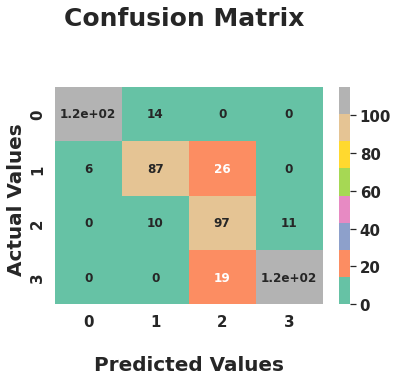

In [ ]:
# Predict on the model
# Get the predicted probabilities
trainscore =  DTgmodel.score(x_train,y_train)
testscore =  DTgmodel.score(x_test,y_test) 
print("train score: {}".format(trainscore),'\n')
print("test score: {}".format(testscore),'\n')
y_predgDT = DTgmodel.predict(x_test)
print(' f1 score: ',f1_score(y_test, y_predgDT,average='micro'),'\n')

# Get the confusion matrix for both train and test
DT_cross_matrix=confusion_matrix(y_test, y_predgDT)
print(DT_cross_matrix)

ax = sns.heatmap(DT_cross_matrix, annot=True, cmap='Set2')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Prediction
y_pred_test = DTgmodel.predict(x_test)
y_pres_train = DTgmodel.predict(x_train)

# Evaluation metrics for test
print(' precision score: ',precision_score(y_test, y_predgDT,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predgDT,average='micro'),'\n')
print(classification_report(y_test, y_pred_test))

 precision score:  0.828 

 recall score:  0.828 

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       129
           1       0.78      0.73      0.76       119
           2       0.68      0.82      0.75       118
           3       0.91      0.86      0.88       134

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.84      0.83      0.83       500



In [ ]:
# Decision Tree 
probabilityValues = DTmodel.predict_proba(x)
auc = roc_auc_score(y,probabilityValues,multi_class ='ovr')
print(auc)

0.9801097094911354


#### What hyperparameter optimization technique did you employ, and why? 

GridSearchCV employs the Grid Search technique to find the best hyperparameters to improve model performance.

Our goal should be to find the best hyperparameter values for our model in order to get the best prediction results. However, the question of how to find the best sets of hyperparameters arises. The Manual Search method can be used to find the best hyperparameters by using a hit and trial process, which would take a long time to build a single model.

As a result, methods such as Random Search and GridSearch were developed. Grid Search calculates the performance for each combination of all the specified hyperparameters and their values and selects the best value for the hyperparameters. Based on the number of hyperparameters involved, this makes processing time-consuming and costly.

GridSearchCV performs cross-validation in addition to Grid Search. When training the model, cross-validation is used.

As a result, I used the GridsearCV method for hyperparameter optimization.



#### Have you noticed any progress? Take note of the progress with the updated Evaluation metric Score Chart.




The training score is 89%, while the testing score is 82%.

For the test dataset,

    a. I obtained a low(0) price precision of 95%, a recall of 89%, and a f1-score of 92%.

    b. I obtained a medium(1) price precision of 78%, a recall of 73%, and a f1-score of 76%.

    c. I received a High(2) price precision of 68%, a recall of 82%, and a f1-score of 75%.

    d. I obtained a very high (3) price precision of 91%, recall of 86%, and f1-score of 88%.

### ML Model 6 - **Implementing Random forest Classifier**

In [ ]:
#applying random forest classifier
RFmodel=  RandomForestClassifier(criterion='entropy',max_depth=9) 
RFmodel.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9)

train score: 0.9973297730307076 

test score: 0.856  

 f1 score:  0.856 

[[123   6   0   0]
 [  7  93  19   0]
 [  0  15  91  12]
 [  0   0  13 121]]


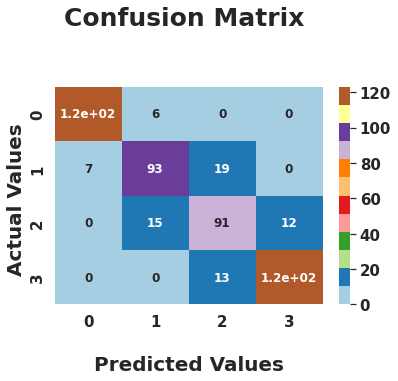

In [ ]:
trainscore =  RFmodel.score(x_train,y_train)
testscore =  RFmodel.score(x_test,y_test)  
y_predRF =  RFmodel.predict(x_test)

print("train score: {}".format(trainscore),'\n')
print("test score: {} ".format(testscore),'\n')
print(' f1 score: ',f1_score(y_test, y_predRF,average='micro'),'\n')
Rf_matrix=confusion_matrix(y_test, y_predRF)
print(Rf_matrix)

ax = sns.heatmap(Rf_matrix, annot=True, cmap='Paired')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(' precision score: ',precision_score(y_test, y_predRF,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predRF,average='micro'),'\n')
print(classification_report(y_test, y_predRF))

 precision score:  0.856 

 recall score:  0.856 

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       129
           1       0.82      0.78      0.80       119
           2       0.74      0.77      0.76       118
           3       0.91      0.90      0.91       134

    accuracy                           0.86       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.86      0.86      0.86       500



In [ ]:
# Random Forest
probabilityValues = RFmodel.predict_proba(x)
auc = roc_auc_score(y,probabilityValues,multi_class ='ovr')
print(auc)

0.9971869041855428


Finally, we achieved a result in the Random Forest classifier!!

1. To build the model, I used the Random Forest classifier. However I did not get Satisfactory result.

2. The training score is 99%, and the testing score is 85%.

3. For the testing dataset, I discovered precision of 85%, recall of 85%, and a f1-score of 85%. However, I am also curious to see the results for the mobile price range.

    a. I obtained a low(0) price precision of 95%, a recall of 95%, and a f1-score of 95%.

    b. I received a medium(1) price precision of 82%, recall of 78%, and a f1-score of 80%.

    c. I received a High(2) price precision of 74%, a recall of 77%, and a f1-score of 76%.

    d. I obtained a very high (3) price precision of 91%, recall of 90%, and f1-score of 91%.

### Cross Validation

In [ ]:
#cross validation
params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
          'min_samples_split':[2,4,6],
         'max_features':['sqrt',4,'log2','auto'],
         'max_leaf_nodes':[10, 20, 40]
         }
rf = RandomForestClassifier()
rfgd = GridSearchCV(rf, params, scoring='accuracy', cv=3)
rfgd.fit(x, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

### **Hypertuning of Random forest Classifier**

In [ ]:
#find best params value
rfgd.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': 40,
 'min_samples_split': 4,
 'n_estimators': 200}

In [ ]:
#find best estimeter
rfgd.best_estimator_ 

RandomForestClassifier(max_depth=20, max_features='auto', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [ ]:
#find best score
rfgd.best_score_

0.8558558558558559

In [ ]:
rfgd = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rfgd.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

Classification Report for Decision Tree (Test set)= 
train score: 0.9465954606141522 

test score: 0.82  

 precision score:  0.82 

 recall score:  0.82 

[[124   5   0   0]
 [ 11  88  20   0]
 [  0  24  79  15]
 [  0   0  15 119]]


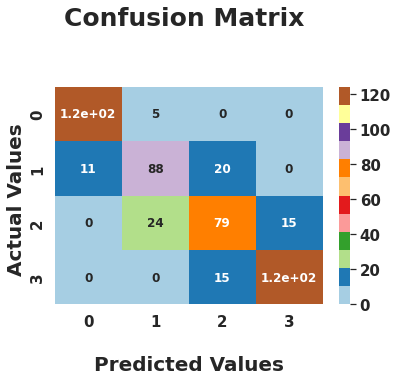

In [ ]:
# Prediction

y_pred_test = rfgd.predict(x_test)
y_pres_train = rfgd.predict(x_train)
# Evaluation metrics for test
trainscore =  rfgd.score(x_train,y_train)
testscore =  rfgd.score(x_test,y_test)  

print('Classification Report for Decision Tree (Test set)= ')
print("train score: {}".format(trainscore),'\n')
print("test score: {} ".format(testscore),'\n')
print(' precision score: ',precision_score(y_test, y_pred_test,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_pred_test,average='micro'),'\n')
Rf_cross_matrix=confusion_matrix(y_test, y_pred_test)
print(Rf_cross_matrix)

ax = sns.heatmap(Rf_cross_matrix, annot=True, cmap='Paired')
ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(' precision score: ',precision_score(y_test, y_pred_test,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_pred_test,average='micro'),'\n')
Rf_cross_matrix=classification_report(y_test, y_pred_test)
print(Rf_cross_matrix)

 precision score:  0.82 

 recall score:  0.82 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       129
           1       0.75      0.74      0.75       119
           2       0.69      0.67      0.68       118
           3       0.89      0.89      0.89       134

    accuracy                           0.82       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.82      0.82      0.82       500



#### Which hyperparameter optimization technique have you used and why?

GridSearchCV employs the Grid Search technique to find the best hyperparameters to improve model performance.

Our goal should be to find the best hyperparameter values for our model in order to get the best prediction results. However, the question of how to find the best sets of hyperparameters arises. The Manual Search method can be used to find the best hyperparameters by using a hit and trial process, which would take a long time to build a single model.

As a result, methods such as Random Search and GridSearch were developed. Grid Search calculates the performance for each combination of all the specified hyperparameters and their values and selects the best value for the hyperparameters.

GridSearchCV performs cross-validation in addition to Grid Search. When training the model, cross-validation is used.

As a result, I used the GridsearCV method for hyperparameter optimization.

#### Have you noticed any progress? Take note of the progress with the updated Evaluation metric Score Chart.

As a result, methods such as Random Search and GridSearch were developed. Grid Search calculates the performance for each combination of all the specified hyperparameters and their values and selects the best value for the hyperparameters.

GridSearchCV performs cross-validation in addition to Grid Search. When training the model, cross-validation is used.

As a result, I used the GridsearCV method for hyperparameter optimization.

The training score is 94%, while the testing score is 82%.

For the test dataset,

a.I obtained a low(0) price precision of 92%, a recall of 96%, and a f1-score of 94%.

b.I obtained a medium(1) price precision of 75%, recall of 74%, and a f1-score of 74%.

c.I received a High(2) price precision of 69%, a recall of 67%, and a f1-score of 68%.

d.I obtained a very high (3) price precision of 89%, recall of 89%, and f1-score of 89%.

### ML Model 7 - **Implementing XGB Classifier**

In [ ]:
# Applying XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(x_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

Train_score: 1.0 

test score: 0.882 

 precision score:  0.882 

 recall score:  0.882 

[[117  12   0   0]
 [  5 102  12   0]
 [  0  12  95  11]
 [  0   0   7 127]]


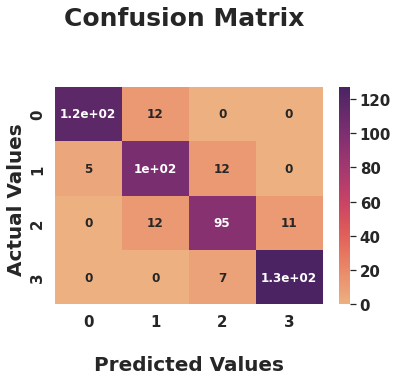

In [ ]:
# Prediction
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

# Evaluation metrics for test
print('Train_score:',accuracy_score(y_train,y_pred_train),'\n')
print('test score:',accuracy_score(y_test,y_pred_test),'\n')
print(' precision score: ',precision_score(y_test, y_pred_test,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_pred_test,average='micro'),'\n')
xgb_matrix = confusion_matrix(y_test, y_pred_test)
print(xgb_matrix)

ax = sns.heatmap(xgb_matrix, annot=True, cmap='flare')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(' precision score: ',precision_score(y_test, y_pred_test,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_pred_test,average='micro'),'\n')
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

 precision score:  0.882 

 recall score:  0.882 

Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       129
           1       0.81      0.86      0.83       119
           2       0.83      0.81      0.82       118
           3       0.92      0.95      0.93       134

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



Finally, we achieved success in the XGB classifier!

1. To build the model, I utilised the xgb classifier. I received pretty good results.

2. The teting score is 88% and the training score is 100%.

3. I discovered precision of 88%, recall of 88%, and a f1-score of 88% for the testing dataset. Nevertheless, I'm particularly curious to check the mobile pricing range results too

    a. I received a f1-score of 93%, low(0) price precision of 96%, recall of 91%, and both.

    b. I received a f1 score of 83%, medium(1) pricing precision of 81%, recall of 86%, and results.

    c. My High(2) price precision was 83%, my recall was 81%, and my f1-score was 82%.

    d. I obtained very high (3) price precision values of 92% and recall 95%, as well as a f1-score of 93%.

### **Cross validation**

In [ ]:
# Cross validation
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(xgb, param_grid={'n_estimators': (10, 200), 'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': (5, 10),
                                     'gamma': [1.5, 1.8], 'subsample': [0.3, 0.5, 0.8]}, cv = 5, scoring = 'accuracy', verbose = 10)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 1/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.840 total time=   0.1s
[CV 2/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 2/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.840 total time=   0.1s
[CV 3/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 3/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.853 total time=   0.1s
[CV 4/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 4/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.849 total time=   0.1s
[CV 5/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             param_grid={'gamma': [1.5, 1.8],
                         'learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': (5, 10), 'n_estimators': (10, 200),
                         'subsample': [0.3, 0.5, 0.8]},
             scoring='accuracy', verbose=10)

In [ ]:
#find best params value
grid.best_params_

{'gamma': 1.5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 0.5}

In [ ]:
#find best estimeter
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
#applying best estimeter value in xgboost
model=XGBClassifier(gamma=1.5, max_depth=10, n_estimators=200,
              objective='multi:softprob', subsample=0.5)
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

train score: 0.9873164218958611 

test score: 0.9 

 f1 score:  0.9 

[[120   9   0   0]
 [  6 103  10   0]
 [  0   8 102   8]
 [  0   0   9 125]]


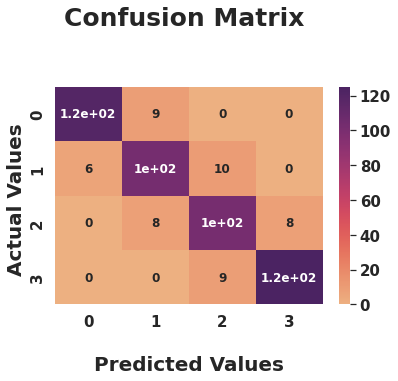

In [ ]:
# Predict on the model
# Get the predicted probabilities
trainscore =  model.score(x_train,y_train)
testscore =  model.score(x_test,y_test) 
print("train score: {}".format(trainscore),'\n')
print("test score: {}".format(testscore),'\n')
y_predxgb = model.predict(x_test)
print(' f1 score: ',f1_score(y_test, y_predxgb,average='micro'),'\n')

# Get the confusion matrix for both train and test
xgb_cross_matrix=confusion_matrix(y_test, y_predxgb)
print(xgb_cross_matrix)

ax = sns.heatmap(xgb_cross_matrix, annot=True, cmap='flare')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Evaluation metrics for train
print(' precision score: ',precision_score(y_test, y_predxgb,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predxgb,average='micro'),'\n')
score = classification_report(y_train, y_pred_train)
print('Classification Report for tuned XGBoost(Train set)= ')
print(score)

 precision score:  0.9 

 recall score:  0.9 

Classification Report for tuned XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       371
           1       1.00      1.00      1.00       380
           2       1.00      1.00      1.00       382
           3       1.00      1.00      1.00       365

    accuracy                           1.00      1498
   macro avg       1.00      1.00      1.00      1498
weighted avg       1.00      1.00      1.00      1498



In [ ]:
# XGBoosting Classifier 
probabilityValues = RFmodel.predict_proba(x)
auc = roc_auc_score(y,probabilityValues,multi_class ='ovr')
print(auc)

0.9971869041855428


#### Which hyperparameter optimization technique have you used and why? 

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

Our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

#### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Finally, the cross validation of the XGB classifier produced positive results!

Test scores for training are 90% and 98% respectively.

In the test dataset,

A. I achieved 100% f1-score, 100% recall, and 100% low(0) pricing precision.

B. I obtained 100% recall, 100% medium(1) pricing precision, and 100% f1-score.

c. I obtained 100% recall, 100% High(2) price precision, and 100% f1-score.

d. I received a very high (3) pricing precision, 100% recall, and 100% f1-score.

# **1. Which ML model did you choose from the above created models as your final prediction model and why?**

I have selected a hyperparameter-optimized logistic regression model and XGBoost Classifier. I need to predict the price range for mobile devices precisely first. Thus, we implemented kernel SVM, Random Forest, and XgBoost for improved accuracy. I thus experimented with XGBoost Classifier and logistic regression. I want to compare these evaluation measures of theirs.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

We looked at classification in this article. Classifiers stand for the nexus of splitting machine theory and real-world application. These algorithms do more than merely use sorting to categorize instances of unlabeled data into separate groups. The dynamic rules used by classifiers are specific to the type of inputs being analysed and contain an interpretation mechanism for handling ambiguous or unknown values. The majority of classifiers also employ probability estimates, which let users change the utility functions used to categorise data.

1. From EDA, we can observe that there are four different price categories for mobile phones. Almost the same number of components are present.

2. Half of the devices have Bluetooth, whereas the other half do not.

3. When the price range widens, the battery gradually gets more powerful.

4. The price range for Ram increases steadily as it moves from low to extremely high prices.

5. Expensive phones are smaller.

6. The most important factors in determining the price range of a mobile phone were RAM, battery life, and pixels.

7. Based on the results of the aforementioned trials, we can say that the XGboost classifier and Logistic regression with the use of hyperparameters produced the best outcomes.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***